In [ ]:
Eye_Diseases/glaucoma/train/images

In [5]:
import os
import shutil

relative_source_path = '../train/optic_disc'  # fix here
destination_folder = 'SMDG/disc_mask'        # new folder inside current folder

cwd = os.getcwd()
print(f"Current working directory: {cwd}")

source_folder = os.path.abspath(os.path.join(cwd, relative_source_path))
destination_folder = os.path.abspath(os.path.join(cwd, destination_folder))

print(f"Resolved source folder path: {source_folder}")
print(f"Resolved destination folder path: {destination_folder}")

if not os.path.exists(source_folder):
    print(f"Source folder '{source_folder}' does not exist. Please check the path.")
else:
    os.makedirs(destination_folder, exist_ok=True)
    try:
        for item in os.listdir(source_folder):
            src = os.path.join(source_folder, item)
            dst = os.path.join(destination_folder, item)

            print(f"Copying '{src}' to '{dst}'...")
            if os.path.isdir(src):
                shutil.copytree(src, dst, dirs_exist_ok=True)
            else:
                shutil.copy2(src, dst)

        print(f"\nContents copied successfully.")
    except Exception as e:
        print(f"Error copying files: {e}")


Current working directory: /media/mnt/jupyter/Eye_Diseases/glaucoma/heinz
Resolved source folder path: /media/mnt/jupyter/Eye_Diseases/glaucoma/train/optic_disc
Resolved destination folder path: /media/mnt/jupyter/Eye_Diseases/glaucoma/heinz/SMDG/disc_mask
Copying '/media/mnt/jupyter/Eye_Diseases/glaucoma/train/optic_disc/REFUGE1-val-305.png' to '/media/mnt/jupyter/Eye_Diseases/glaucoma/heinz/SMDG/disc_mask/REFUGE1-val-305.png'...
Copying '/media/mnt/jupyter/Eye_Diseases/glaucoma/train/optic_disc/REFUGE1-val-275.png' to '/media/mnt/jupyter/Eye_Diseases/glaucoma/heinz/SMDG/disc_mask/REFUGE1-val-275.png'...
Copying '/media/mnt/jupyter/Eye_Diseases/glaucoma/train/optic_disc/REFUGE1-train-318.png' to '/media/mnt/jupyter/Eye_Diseases/glaucoma/heinz/SMDG/disc_mask/REFUGE1-train-318.png'...
Copying '/media/mnt/jupyter/Eye_Diseases/glaucoma/train/optic_disc/REFUGE1-val-272.png' to '/media/mnt/jupyter/Eye_Diseases/glaucoma/heinz/SMDG/disc_mask/REFUGE1-val-272.png'...
Copying '/media/mnt/jupyter

In [6]:
import os
import cv2
import numpy as np

# ---- CONFIGURATION ----
cup_mask_dir = 'SMDG/cup_mask'    # folder with cup masks
disc_mask_dir = 'SMDG/disc_mask'  # folder with disc masks
output_dir = 'SMDG/combined_masks' # where to save the final masks
# ------------------------

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of mask filenames (assuming both folders have the same files)
mask_filenames = sorted(os.listdir(cup_mask_dir))

for filename in mask_filenames:
    cup_path = os.path.join(cup_mask_dir, filename)
    disc_path = os.path.join(disc_mask_dir, filename)

    # Read masks in grayscale
    cup_mask = cv2.imread(cup_path, cv2.IMREAD_GRAYSCALE)
    disc_mask = cv2.imread(disc_path, cv2.IMREAD_GRAYSCALE)

    if cup_mask is None or disc_mask is None:
        print(f"Skipping {filename}: one of the masks is missing or unreadable.")
        continue

    # Create a blank canvas
    combined_mask = np.zeros_like(cup_mask, dtype=np.uint8)

    # Set disc area to grey (128)
    combined_mask[disc_mask == 255] = 128

    # Overwrite cup area with white (255)
    combined_mask[cup_mask == 255] = 255

    # Save result
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, combined_mask)

    print(f"Combined mask saved: {output_path}")


Skipping .ipynb_checkpoints: one of the masks is missing or unreadable.
Combined mask saved: SMDG/combined_masks/ORIGA-70.png
Combined mask saved: SMDG/combined_masks/ORIGA-86.png
Combined mask saved: SMDG/combined_masks/ORIGA-87.png
Combined mask saved: SMDG/combined_masks/ORIGA-92.png
Combined mask saved: SMDG/combined_masks/ORIGA-93.png
Combined mask saved: SMDG/combined_masks/PAPILA-104.png
Combined mask saved: SMDG/combined_masks/PAPILA-115.png
Combined mask saved: SMDG/combined_masks/PAPILA-147.png
Combined mask saved: SMDG/combined_masks/PAPILA-159.png
Combined mask saved: SMDG/combined_masks/PAPILA-160.png
Combined mask saved: SMDG/combined_masks/PAPILA-161.png
Combined mask saved: SMDG/combined_masks/PAPILA-179.png
Combined mask saved: SMDG/combined_masks/PAPILA-185.png
Combined mask saved: SMDG/combined_masks/PAPILA-186.png
Combined mask saved: SMDG/combined_masks/PAPILA-228.png
Combined mask saved: SMDG/combined_masks/PAPILA-232.png
Combined mask saved: SMDG/combined_masks/P

In [9]:
import cv2
import os

folder_path = 'ORIGA+G1020/images'
delete_jpg = False

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        jpg_path = os.path.join(folder_path, filename)
        png_filename = os.path.splitext(filename)[0] + '.png'
        png_path = os.path.join(folder_path, png_filename)

        try:
            img = cv2.imread(jpg_path)
            if img is not None:
                cv2.imwrite(png_path, img)
                print(f"Converted: {filename} → {png_filename}")
                if delete_jpg:
                    os.remove(jpg_path)
                    print(f"Deleted original JPG: {filename}")
            else:
                print(f"Failed to load image: {filename}")
        except Exception as e:
            print(f"Error converting {filename}: {e}")


Converted: 004.jpg → 004.png
Converted: image_543.jpg → image_543.png
Converted: 512.jpg → 512.png
Converted: image_1234.jpg → image_1234.png
Converted: 072.jpg → 072.png
Converted: image_1825.jpg → image_1825.png
Converted: image_1590.jpg → image_1590.png
Converted: 500.jpg → 500.png
Converted: V0044.jpg → V0044.png
Converted: image_2552.jpg → image_2552.png
Converted: image_2232.jpg → image_2232.png
Converted: image_235.jpg → image_235.png
Converted: image_2857.jpg → image_2857.png
Converted: image_1927.jpg → image_1927.png
Converted: 613.jpg → 613.png
Converted: image_1140.jpg → image_1140.png
Converted: 503.jpg → 503.png
Converted: 255.jpg → 255.png
Converted: image_1226.jpg → image_1226.png
Converted: V0058.jpg → V0058.png
Converted: image_2685.jpg → image_2685.png
Converted: 138.jpg → 138.png
Converted: g0040.jpg → g0040.png
Converted: image_1160.jpg → image_1160.png
Converted: image_1901.jpg → image_1901.png
Converted: V0284.jpg → V0284.png
Converted: image_1415.jpg → image_1415

In [10]:
import os
import cv2

folder_path = 'ORIGA+G1020/images'  # Change to your folder path

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        file_path = os.path.join(folder_path, filename)
        
        # Verify if the file is a valid image
        img = cv2.imread(file_path)
        if img is not None:
            try:
                os.remove(file_path)
                print(f"Deleted: {filename}")
            except Exception as e:
                print(f"Failed to delete {filename}: {e}")
        else:
            print(f"Skipped (not a valid image): {filename}")


Deleted: 004.jpg
Deleted: image_543.jpg
Deleted: 512.jpg
Deleted: image_1234.jpg
Deleted: 072.jpg
Deleted: image_1825.jpg
Deleted: image_1590.jpg
Deleted: 500.jpg
Deleted: V0044.jpg
Deleted: image_2552.jpg
Deleted: image_2232.jpg
Deleted: image_235.jpg
Deleted: image_2857.jpg
Deleted: image_1927.jpg
Deleted: 613.jpg
Deleted: image_1140.jpg
Deleted: 503.jpg
Deleted: 255.jpg
Deleted: image_1226.jpg
Deleted: V0058.jpg
Deleted: image_2685.jpg
Deleted: 138.jpg
Deleted: g0040.jpg
Deleted: image_1160.jpg
Deleted: image_1901.jpg
Deleted: V0284.jpg
Deleted: image_1415.jpg
Deleted: image_335.jpg
Deleted: 580.jpg
Deleted: 557.jpg
Deleted: image_3080.jpg
Deleted: 205.jpg
Deleted: image_861.jpg
Deleted: image_821.jpg
Deleted: 012.jpg
Deleted: 224.jpg
Deleted: image_2002.jpg
Deleted: 524.jpg
Deleted: image_32.jpg
Deleted: 587.jpg
Deleted: V0346.jpg
Deleted: image_3024.jpg
Deleted: image_1081.jpg
Deleted: 214.jpg
Deleted: 086.jpg
Deleted: image_261.jpg
Deleted: image_2412.jpg
Deleted: image_2162.jpg


In [14]:
import cv2
import numpy as np
import os

def convert_masks_to_visible_rgb(input_folder):
    output_folder = os.path.join(input_folder, 'visible_masks')
    os.makedirs(output_folder, exist_ok=True)  # Create if doesn't exist

    for filename in os.listdir(input_folder):
        if filename.lower().endswith('.png'):
            mask_path = os.path.join(input_folder, filename)

            # Skip the output folder if loop re-enters it
            if os.path.isdir(mask_path):
                continue

            # Load grayscale mask
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if mask is None:
                print(f"Skipping unreadable file: {filename}")
                continue

            # Initialize RGB mask
            rgb_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
            rgb_mask[mask == 1] = [128, 128, 128]  # Disc → Gray
            rgb_mask[mask == 2] = [255, 255, 255]  # Cup → White

            # Save to new folder with same name
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, rgb_mask)
            print(f"Saved: {output_path}")

# Example usage
input_folder = 'ORIGA+G1020/mask'  # 🔁 Replace this with your actual path
convert_masks_to_visible_rgb(input_folder)


Saved: ORIGA+G1020/mask/visible_masks/073.png
Saved: ORIGA+G1020/mask/visible_masks/image_493.png
Saved: ORIGA+G1020/mask/visible_masks/048.png
Saved: ORIGA+G1020/mask/visible_masks/383.png
Saved: ORIGA+G1020/mask/visible_masks/030.png
Saved: ORIGA+G1020/mask/visible_masks/614.png
Saved: ORIGA+G1020/mask/visible_masks/image_47.png
Saved: ORIGA+G1020/mask/visible_masks/499.png
Saved: ORIGA+G1020/mask/visible_masks/image_860.png
Saved: ORIGA+G1020/mask/visible_masks/509.png
Saved: ORIGA+G1020/mask/visible_masks/220.png
Saved: ORIGA+G1020/mask/visible_masks/380.png
Saved: ORIGA+G1020/mask/visible_masks/374.png
Saved: ORIGA+G1020/mask/visible_masks/image_2734.png
Saved: ORIGA+G1020/mask/visible_masks/image_2291.png
Saved: ORIGA+G1020/mask/visible_masks/image_490.png
Saved: ORIGA+G1020/mask/visible_masks/078.png
Saved: ORIGA+G1020/mask/visible_masks/image_1351.png
Saved: ORIGA+G1020/mask/visible_masks/021.png
Saved: ORIGA+G1020/mask/visible_masks/image_566.png
Saved: ORIGA+G1020/mask/visibl

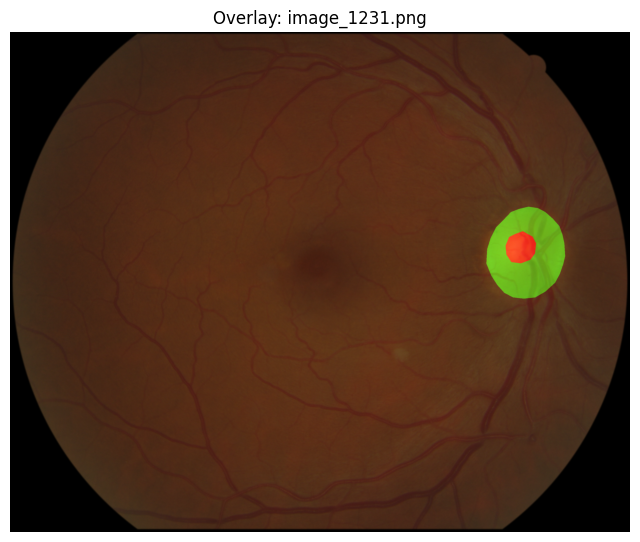

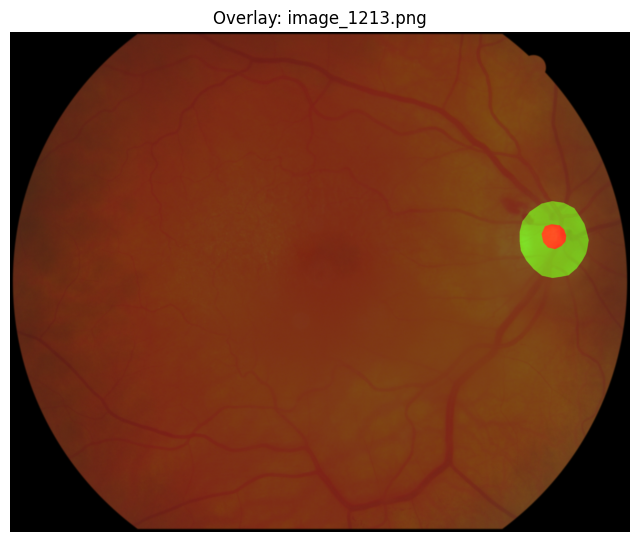

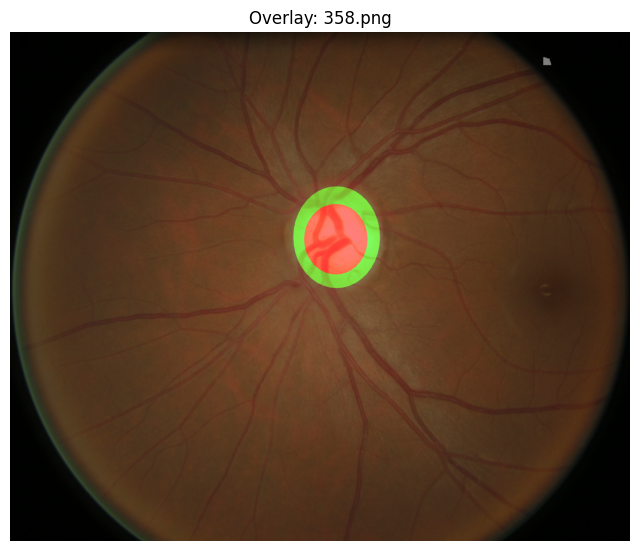

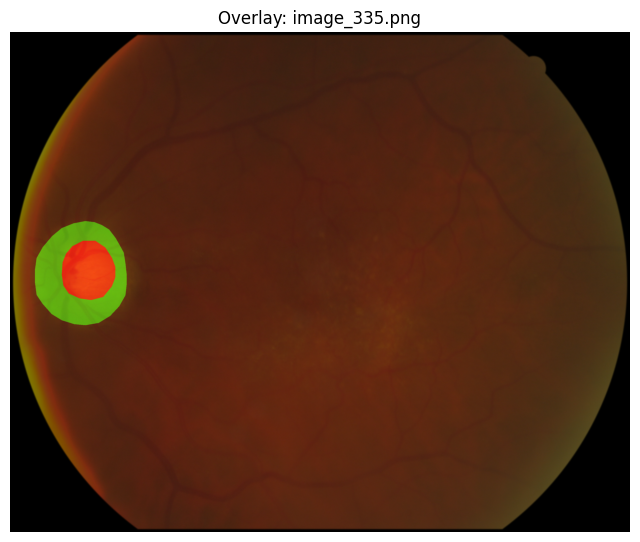

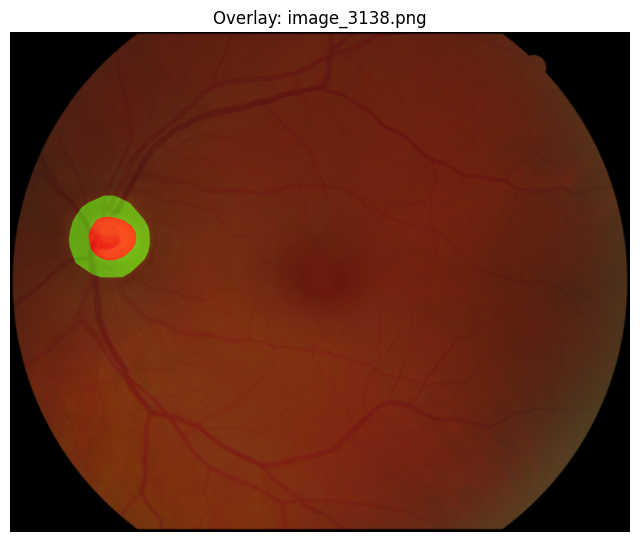

In [15]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

def overlay_mask_on_image_matplotlib(image_folder, mask_folder, alpha=0.5, count=5):
    """
    Overlay random masks on images and show with matplotlib (no saving).

    Parameters:
    - image_folder: folder containing original images (color)
    - mask_folder: folder containing grayscale masks (cup=white, disc=gray)
    - alpha: transparency of the overlay (0-1)
    - count: number of random samples to display
    """
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    mask_files = [f for f in os.listdir(mask_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    common_files = list(set(image_files) & set(mask_files))

    if len(common_files) == 0:
        print("No matching files found between image and mask folders.")
        return

    samples = random.sample(common_files, min(count, len(common_files)))

    for filename in samples:
        img_path = os.path.join(image_folder, filename)
        mask_path = os.path.join(mask_folder, filename)

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            print(f"Skipping {filename}, unable to read image or mask.")
            continue

        # Convert BGR to RGB for matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Create color overlay
        overlay = np.zeros_like(img_rgb)
        overlay[mask == 255] = [255, 0, 0]   # Cup = Red
        overlay[mask == 128] = [0, 255, 0]   # Disc = Green

        # Blend image and overlay
        blended = cv2.addWeighted(img_rgb, 1 - alpha, overlay, alpha, 0)

        # Plot with matplotlib
        plt.figure(figsize=(8, 8))
        plt.title(f'Overlay: {filename}')
        plt.imshow(blended)
        plt.axis('off')
        plt.show()

# Example usage
image_folder = 'ORIGA+G1020/images'  # Replace with your image folder
mask_folder = 'ORIGA+G1020/visible_masks'    # Replace with your mask folder

overlay_mask_on_image_matplotlib(image_folder, mask_folder, alpha=0.5, count=5)


In [19]:
import os
import shutil

def copy_png_files(src_folder, dst_folder):
    os.makedirs(dst_folder, exist_ok=True)  # Create destination folder if not exists

    for filename in os.listdir(src_folder):
        if filename.lower().endswith('.png'):
            src_path = os.path.join(src_folder, filename)
            dst_path = os.path.join(dst_folder, filename)

            shutil.copy2(src_path, dst_path)  # copy2 preserves metadata
            print(f"Copied: {filename}")

# Example usage:
source_folder = 'ORIGA+G1020/visible_masks'  # Replace with your source folder path
destination_folder = 'SMDG+ORIGA+G1020/masks'  # Replace with your destination folder path

copy_png_files(source_folder, destination_folder)


Copied: 073.png
Copied: image_493.png
Copied: 048.png
Copied: 383.png
Copied: 030.png
Copied: 614.png
Copied: image_47.png
Copied: 499.png
Copied: image_860.png
Copied: 509.png
Copied: 220.png
Copied: 380.png
Copied: 374.png
Copied: image_2734.png
Copied: image_2291.png
Copied: image_490.png
Copied: 078.png
Copied: image_1351.png
Copied: 021.png
Copied: image_566.png
Copied: T0310.png
Copied: image_1240.png
Copied: T0363.png
Copied: 056.png
Copied: image_164.png
Copied: image_498.png
Copied: image_2345.png
Copied: image_595.png
Copied: image_1592.png
Copied: 006.png
Copied: 041.png
Copied: 117.png
Copied: image_630.png
Copied: image_124.png
Copied: image_2124.png
Copied: T0223.png
Copied: image_1233.png
Copied: 599.png
Copied: 454.png
Copied: 195.png
Copied: V0376.png
Copied: image_55.png
Copied: image_875.png
Copied: 004.png
Copied: V0012.png
Copied: image_3025.png
Copied: image_2375.png
Copied: 330.png
Copied: image_1092.png
Copied: 192.png
Copied: g0036.png
Copied: image_1702.png
Co

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
from collections import Counter

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp

class FundusDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def convert_mask(self, mask):
        mask_class = np.zeros_like(mask, dtype=np.uint8)
        mask_class[mask == 255] = 2  # cup
        mask_class[mask == 128] = 1  # disc
        mask_class[mask == 0] = 0    # background
        return mask_class

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)
        mask = self.convert_mask(mask)

        image = cv2.resize(image, (512, 512))
        mask = cv2.resize(mask, (512, 512), interpolation=cv2.INTER_NEAREST)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask'].long()

        return image, mask


def compute_class_weights(mask_paths, num_classes=3):
    all_pixels = []
    for path in tqdm(mask_paths, desc="Calculating class weights"):
        mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        # Convert mask to class indices like in FundusDataset.convert_mask
        mask_class = np.zeros_like(mask, dtype=np.uint8)
        mask_class[mask == 255] = 2  # cup
        mask_class[mask == 128] = 1  # disc
        mask_class[mask == 0] = 0    # background
        all_pixels.append(mask_class.flatten())

    all_pixels = np.concatenate(all_pixels)
    counts = Counter(all_pixels.tolist())

    total = sum(counts.values())
    freqs = [counts.get(i, 1) / total for i in range(num_classes)]
    weights = [1.0 / f for f in freqs]

    # Normalize weights so sum to 1
    norm_weights = [w / sum(weights) for w in weights]
    class_weights = torch.tensor(norm_weights, dtype=torch.float)

    return class_weights

def get_transforms():
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.3),
        A.RandomBrightnessContrast(p=0.3),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.4),
        A.GaussianBlur(p=0.1),
        A.GaussNoise(p=0.1),
        A.Resize(512, 512),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])

def get_image_mask_pairs(img_dir, mask_dir, img_ext='.png', mask_ext='.png'):
    img_files = [f for f in os.listdir(img_dir) if f.lower().endswith(img_ext)]
    mask_files = [f for f in os.listdir(mask_dir) if f.lower().endswith(mask_ext)]

    img_basenames = set(os.path.splitext(f)[0] for f in img_files)
    mask_basenames = set(os.path.splitext(f)[0] for f in mask_files)
    common_basenames = sorted(img_basenames.intersection(mask_basenames))

    image_paths = [os.path.join(img_dir, name + img_ext) for name in common_basenames]
    mask_paths = [os.path.join(mask_dir, name + mask_ext) for name in common_basenames]

    return image_paths, mask_paths

def get_model():
    return smp.DeepLabV3Plus(
        encoder_name="resnet101",
        encoder_weights="imagenet",
        in_channels=3,
        classes=3
    )

def get_loss(class_weights=None):
    ce = nn.CrossEntropyLoss(weight=class_weights)
    dice = smp.losses.DiceLoss(mode='multiclass', classes=3)

    def combined_loss(pred, target):
        return ce(pred, target) + dice(pred, target)
    return combined_loss


def dice_score(preds, targets, epsilon=1e-6):
    preds = torch.softmax(preds, dim=1)
    preds = torch.argmax(preds, dim=1)

    pred_disc = (preds == 1).float()
    target_disc = (targets == 1).float()
    intersection_disc = (pred_disc * target_disc).sum()
    union_disc = pred_disc.sum() + target_disc.sum()
    dice_c_disc = (2. * intersection_disc + epsilon) / (union_disc + epsilon)

    pred_cup = (preds == 2).float()
    target_cup = (targets == 2).float()
    intersection_cup = (pred_cup * target_cup).sum()
    union_cup = pred_cup.sum() + target_cup.sum()
    dice_c_cup = (2. * intersection_cup + epsilon) / (union_cup + epsilon)

    avg_dice = (dice_c_disc + dice_c_cup) / 2

    return dice_c_disc.item(), dice_c_cup.item(), avg_dice.item()

def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for imgs, masks in tqdm(dataloader):
        imgs, masks = imgs.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    total_dice_disc = 0
    total_dice_cup = 0

    with torch.no_grad():
        for imgs, masks in tqdm(dataloader):
            imgs, masks = imgs.to(device), masks.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, masks)
            total_loss += loss.item()
            dice_disc, dice_cup, _ = dice_score(outputs, masks)
            total_dice_disc += dice_disc
            total_dice_cup += dice_cup

    avg_dice_disc = total_dice_disc / len(dataloader)
    avg_dice_cup = total_dice_cup / len(dataloader)
    avg_dice = (avg_dice_disc + avg_dice_cup) / 2

    return total_loss / len(dataloader), avg_dice_disc, avg_dice_cup, avg_dice

def run_training(
    train_img_dir, train_mask_dir, val_img_dir, val_mask_dir,
    epochs=50, batch_size=8, save_path='deeplabv3+_SMDG+ORIGA+G1020.pth', patience=10,
    resume=False, class_weights=None  # new parameter added
):
    train_image_paths, train_mask_paths = get_image_mask_pairs(train_img_dir, train_mask_dir)
    val_image_paths, val_mask_paths = get_image_mask_pairs(val_img_dir, val_mask_dir)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    if class_weights is None:
        print("Class weights not provided, computing from training masks...")
        class_weights = compute_class_weights(train_mask_paths).to(device)
    else:
        print("Using provided class weights.")
        class_weights = class_weights.to(device)
    
    train_dataset = FundusDataset(train_image_paths, train_mask_paths, transform=get_transforms())
    val_dataset = FundusDataset(val_image_paths, val_mask_paths, transform=get_transforms())

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    model = get_model().to(device)

    criterion = get_loss(class_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    start_epoch = 0
    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_avg_dice = 0.0

    if resume and os.path.exists(save_path):
        checkpoint = torch.load(save_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        best_val_loss = checkpoint.get('best_val_loss', best_val_loss)
        start_epoch = checkpoint.get('epoch', 0) + 1
        print(f"Resuming training from epoch {start_epoch}")

    for epoch in range(start_epoch, epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")

        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, dice_disc, dice_cup, avg_dice = validate(model, val_loader, criterion, device)

        print(f"Train Loss: {train_loss:.4f}")
        print(f"Val Loss: {val_loss:.4f} | Dice Disc: {dice_disc:.4f} | Dice Cup: {dice_cup:.4f} | Avg Dice: {avg_dice:.4f}")
        
        if avg_dice > best_avg_dice:
            best_avg_dice = avg_dice
            epochs_no_improve = 0
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'avg_dice': best_avg_dice,
            }, save_path)
            print(f"✅ Saved best model to {save_path}")
        else:
            epochs_no_improve += 1
            print(f"⚠️ No improvement in avg Dice for {epochs_no_improve} epochs.")

        if epochs_no_improve >= patience:
            print(f"⏹️ Early stopping triggered after {patience} epochs.")
            break

    print("✅ Training finished.")


# Run training
custom_weights = torch.tensor([0.0041, 0.2786, 0.7173]) 
run_training(
    train_img_dir="SMDG+ORIGA+G1020/train/images",
    train_mask_dir="SMDG+ORIGA+G1020/train/masks",
    val_img_dir="SMDG+ORIGA+G1020/valid/images",
    val_mask_dir="SMDG+ORIGA+G1020/valid/masks",
    epochs=50,
    batch_size=8,
    save_path='deeplabv3+_SMDG+ORIGA+G1020_withweights.pth',
    patience=10,
    resume=True,
    class_weights=custom_weights
)


/home/expeed/jupyter-dev/lib/python3.12/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Using provided class weights.


/home/expeed/jupyter-dev/lib/python3.12/site-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipykernel_2370/749569530.py:205: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for an

Resuming training from epoch 18

Epoch 19/50


100%|██████████| 33/33 [00:23<00:00,  1.39it/s]


Train Loss: 0.2650
Val Loss: 0.2846 | Dice Disc: 0.8534 | Dice Cup: 0.8518 | Avg Dice: 0.8526
✅ Saved best model to deeplabv3+_SMDG+ORIGA+G1020_withweights.pth

Epoch 20/50


100%|██████████| 33/33 [00:16<00:00,  2.03it/s]


Train Loss: 0.2631
Val Loss: 0.2951 | Dice Disc: 0.8458 | Dice Cup: 0.8486 | Avg Dice: 0.8472
⚠️ No improvement in avg Dice for 1 epochs.

Epoch 21/50


100%|██████████| 33/33 [00:16<00:00,  2.05it/s]


Train Loss: 0.2586
Val Loss: 0.2867 | Dice Disc: 0.8342 | Dice Cup: 0.8487 | Avg Dice: 0.8415
⚠️ No improvement in avg Dice for 2 epochs.

Epoch 22/50


100%|██████████| 33/33 [00:16<00:00,  2.03it/s]


Train Loss: 0.2423
Val Loss: 0.2719 | Dice Disc: 0.8546 | Dice Cup: 0.8548 | Avg Dice: 0.8547
✅ Saved best model to deeplabv3+_SMDG+ORIGA+G1020_withweights.pth

Epoch 23/50


100%|██████████| 33/33 [00:16<00:00,  2.02it/s]


Train Loss: 0.2509
Val Loss: 0.2832 | Dice Disc: 0.8462 | Dice Cup: 0.8463 | Avg Dice: 0.8462
⚠️ No improvement in avg Dice for 1 epochs.

Epoch 24/50


100%|██████████| 33/33 [00:16<00:00,  2.05it/s]


Train Loss: 0.2460
Val Loss: 0.2672 | Dice Disc: 0.8285 | Dice Cup: 0.8483 | Avg Dice: 0.8384
⚠️ No improvement in avg Dice for 2 epochs.

Epoch 25/50


100%|██████████| 33/33 [00:16<00:00,  2.03it/s]


Train Loss: 0.2405
Val Loss: 0.2634 | Dice Disc: 0.8484 | Dice Cup: 0.8536 | Avg Dice: 0.8510
⚠️ No improvement in avg Dice for 3 epochs.

Epoch 26/50


100%|██████████| 33/33 [00:16<00:00,  2.03it/s]


Train Loss: 0.2458
Val Loss: 0.2706 | Dice Disc: 0.8414 | Dice Cup: 0.8413 | Avg Dice: 0.8414
⚠️ No improvement in avg Dice for 4 epochs.

Epoch 27/50


100%|██████████| 33/33 [00:16<00:00,  2.06it/s]


Train Loss: 0.2409
Val Loss: 0.2561 | Dice Disc: 0.8382 | Dice Cup: 0.8550 | Avg Dice: 0.8466
⚠️ No improvement in avg Dice for 5 epochs.

Epoch 28/50


100%|██████████| 33/33 [00:16<00:00,  2.06it/s]


Train Loss: 0.2362
Val Loss: 0.2650 | Dice Disc: 0.8376 | Dice Cup: 0.8492 | Avg Dice: 0.8434
⚠️ No improvement in avg Dice for 6 epochs.

Epoch 29/50


100%|██████████| 33/33 [00:16<00:00,  1.99it/s]


Train Loss: 0.2453
Val Loss: 0.2655 | Dice Disc: 0.8346 | Dice Cup: 0.8452 | Avg Dice: 0.8399
⚠️ No improvement in avg Dice for 7 epochs.

Epoch 30/50


100%|██████████| 33/33 [00:16<00:00,  2.02it/s]


Train Loss: 0.2309
Val Loss: 0.2636 | Dice Disc: 0.8440 | Dice Cup: 0.8487 | Avg Dice: 0.8463
⚠️ No improvement in avg Dice for 8 epochs.

Epoch 31/50


100%|██████████| 33/33 [00:16<00:00,  2.03it/s]


Train Loss: 0.2351
Val Loss: 0.2695 | Dice Disc: 0.8372 | Dice Cup: 0.8482 | Avg Dice: 0.8427
⚠️ No improvement in avg Dice for 9 epochs.

Epoch 32/50


100%|██████████| 33/33 [00:16<00:00,  2.00it/s]

Train Loss: 0.2388
Val Loss: 0.2720 | Dice Disc: 0.8528 | Dice Cup: 0.8507 | Avg Dice: 0.8518
⚠️ No improvement in avg Dice for 10 epochs.
⏹️ Early stopping triggered after 10 epochs.
✅ Training finished.


In [1]:
#calculates the ratio of bg, cup and disc pixels within a mask
#returns a 1D tensor of how the weights should be given [bg, disc, cup]

import os
import cv2
import torch
import numpy as np
from tqdm import tqdm
from collections import Counter

def get_mask_paths(mask_dir, mask_ext='.png'):
    mask_files = [f for f in os.listdir(mask_dir) if f.lower().endswith(mask_ext)]
    mask_paths = [os.path.join(mask_dir, f) for f in mask_files]
    print(f"Found {len(mask_paths)} mask files.")
    return mask_paths

def compute_class_weights_mem_friendly(mask_paths, num_classes=3):
    counts = Counter()
    total_pixels = 0

    for path in tqdm(mask_paths, desc="Calculating class weights"):
        mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        mask_class = np.zeros_like(mask, dtype=np.uint8)
        mask_class[mask == 255] = 2  # cup
        mask_class[mask == 128] = 1  # disc
        mask_class[mask == 0] = 0    # background

        unique, counts_img = np.unique(mask_class, return_counts=True)
        for u, c in zip(unique, counts_img):
            counts[u] += c
        total_pixels += mask_class.size

    freqs = [counts.get(i, 0) / total_pixels for i in range(num_classes)]
    weights = [1.0 / f if f > 0 else 0 for f in freqs]

    sum_weights = sum(weights)
    norm_weights = [w / sum_weights for w in weights]
    class_weights = torch.tensor(norm_weights, dtype=torch.float)

    print(f"Class weights tensor: {class_weights}")
    return class_weights

# Usage:

mask_dir = "SMDG+ORIGA+G1020/train/masks"  # Change this to your mask folder path
mask_paths = get_mask_paths(mask_dir)

class_weights = compute_class_weights_mem_friendly(mask_paths)


Found 2079 mask files.


Calculating class weights: 100%|██████████| 2079/2079 [02:22<00:00, 14.54it/s]

Class weights tensor: tensor([0.0041, 0.2786, 0.7173])


In [1]:
#this shows the best validation loss from that model save state

import torch
import os
def check_saved_val_loss(checkpoint_path):
    if not torch.cuda.is_available():
        map_location = torch.device('cpu')
    else:
        map_location = None  # Automatically maps to GPU if available

    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint not found at {checkpoint_path}")
        return

    checkpoint = torch.load(checkpoint_path, map_location=map_location)

    val_loss = checkpoint.get('best_val_loss', None)
    epoch = checkpoint.get('epoch', None)

    if val_loss is not None:
        print(f"Best validation loss saved: {val_loss:.6f}")
        print(f"Saved after epoch: {epoch}")
    else:
        print("Validation loss not found in checkpoint.")

# Example usage
check_saved_val_loss("deeplabv3+_SMDG+ORIGA+G1020.pth")


/tmp/ipykernel_2410/1415340629.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=map_location)


Best validation loss saved: 0.095549
Saved after epoch: 49


In [11]:
import os
from PIL import Image

def check_corrupt_pngs_stable(folder_path, delete_corrupt=False):
    corrupt_files = []

    for fname in os.listdir(folder_path):
        if not fname.lower().endswith(".png"):
            continue

        full_path = os.path.join(folder_path, fname)

        try:
            with Image.open(full_path) as img:
                img.verify()  # Doesn't load image into memory fully, just checks structure
        except Exception as e:
            print(f"❌ Corrupt: {fname} — {e}")
            corrupt_files.append(fname)
            if delete_corrupt:
                try:
                    os.remove(full_path)
                    print(f"🗑️ Deleted: {fname}")
                except Exception as del_err:
                    print(f"⚠️ Failed to delete {fname}: {del_err}")

    if not corrupt_files:
        print("✅ All PNG images are valid.")
    else:
        print(f"⚠️ Found {len(corrupt_files)} corrupt image(s).")

# Example usage
image_folder = "SMDG+ORIGA+G1020/test/images"
check_corrupt_pngs_stable(image_folder, delete_corrupt=True)


✅ All PNG images are valid.


In [1]:
import os
import cv2
import numpy as np
from collections import defaultdict
from IPython.display import Image, display

# --- Configuration ---
# REPLACE THIS WITH THE ACTUAL PATH TO YOUR MASKS DIRECTORY
MASKS_DIR = 'SMDG+ORIGA+G1020/test/masks'

# Pixel values for cup and disc in your greyscale masks
CUP_LABEL_VALUE = 255  # Assuming white for cup (label 2)
DISC_LABEL_VALUE = 128 # Assuming grey for disc (label 1), adjust if needed

# --- VCDR Calculation Function ---
def calculate_vcdr(mask_image, cup_label, disc_label):
    """
    Calculates the Vertical Cup-to-Disc Ratio (VCDR) from a ground truth mask.
    Assumes cup and disc are distinct pixel values.

    Args:
        mask_image (np.array): The grayscale ground truth mask.
        cup_label (int): The pixel value representing the cup.
        disc_label (int): The pixel value representing the disc.

    Returns:
        float: The calculated VCDR. Returns 0 if disc or cup not found.
    """
    # Create binary masks for cup and disc
    cup_mask = (mask_image == cup_label).astype(np.uint8) * 255
    disc_mask = (mask_image == disc_label).astype(np.uint8) * 255

    # Find contours for cup and disc
    # Use cv2.findContours for OpenCV 4+ which returns (contours, hierarchy)
    # or just contours if OpenCV 3
    cup_contours, _ = cv2.findContours(cup_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    disc_contours, _ = cv2.findContours(disc_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not disc_contours:
        return 0.0 # No disc found, VCDR is 0

    # Get the bounding box for the largest disc contour
    largest_disc_contour = max(disc_contours, key=cv2.contourArea)
    _, disc_y, _, disc_h = cv2.boundingRect(largest_disc_contour)
    disc_vertical_diameter = disc_h

    if not cup_contours:
        return 0.0 # No cup found, VCDR is 0

    # Get the bounding box for the largest cup contour
    largest_cup_contour = max(cup_contours, key=cv2.contourArea)
    _, cup_y, _, cup_h = cv2.boundingRect(largest_cup_contour)
    cup_vertical_diameter = cup_h

    if disc_vertical_diameter == 0:
        return 0.0 # Avoid division by zero

    vcdr = cup_vertical_diameter / disc_vertical_diameter
    return vcdr

# --- Main Script ---
if not os.path.exists(MASKS_DIR):
    print(f"Error: The specified directory '{MASKS_DIR}' does not exist.")
else:
    # Dictionary to store mask paths for each VCDR category
    categorized_masks = defaultdict(list)

    # VCDR ranges
    vcdr_ranges = {
        'VCDR < 0.3': (0, 0.3),
        '0.3 <= VCDR < 0.5': (0.3, 0.5),
        '0.5 <= VCDR < 0.7': (0.5, 0.7),
        'VCDR >= 0.7': (0.7, float('inf'))
    }

    print(f"Processing masks in: {MASKS_DIR}")

    mask_files = [f for f in os.listdir(MASKS_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    if not mask_files:
        print("No image files found in the specified directory.")
    else:
        for filename in mask_files:
            mask_path = os.path.join(MASKS_DIR, filename)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # Read as grayscale

            if mask is None:
                print(f"Warning: Could not read image {filename}. Skipping.")
                continue

            vcdr = calculate_vcdr(mask, CUP_LABEL_VALUE, DISC_LABEL_VALUE)

            for category, (lower_bound, upper_bound) in vcdr_ranges.items():
                if lower_bound <= vcdr < upper_bound:
                    if len(categorized_masks[category]) < 3: # Only collect up to 3 masks per category
                        categorized_masks[category].append((mask_path, vcdr))
                    break # Move to the next mask once categorized

        print("\n--- Categorization Results ---")
        for category, masks in categorized_masks.items():
            print(f"\n{category}:")
            if masks:
                for i, (path, vcdr) in enumerate(masks):
                    print(f"  Mask {i+1}: {os.path.basename(path)} (VCDR: {vcdr:.4f})")
                    # Optional: Display the mask in the notebook
                    # display(Image(filename=path, width=200))
            else:
                print("  No masks found for this category.")

        print("\n--- Summary of Found Masks ---")
        for category, masks_list in categorized_masks.items():
            print(f"{category}: {len(masks_list)} masks found")

Processing masks in: SMDG+ORIGA+G1020/test/masks

--- Categorization Results ---

VCDR < 0.3:
  Mask 1: PAPILA-409.png (VCDR: 0.1443)
  Mask 2: image_1255.png (VCDR: 0.2238)
  Mask 3: PAPILA-441.png (VCDR: 0.0706)

0.3 <= VCDR < 0.5:
  Mask 1: image_1233.png (VCDR: 0.3428)
  Mask 2: REFUGE1-val-99.png (VCDR: 0.4130)
  Mask 3: image_2375.png (VCDR: 0.4258)

0.5 <= VCDR < 0.7:
  Mask 1: 195.png (VCDR: 0.6422)
  Mask 2: image_1702.png (VCDR: 0.6675)
  Mask 3: REFUGE1-val-109.png (VCDR: 0.5417)

VCDR >= 0.7:
  Mask 1: 645.png (VCDR: 0.7111)
  Mask 2: REFUGE1-val-49.png (VCDR: 0.7412)
  Mask 3: 507.png (VCDR: 0.8146)

--- Summary of Found Masks ---
VCDR < 0.3: 3 masks found
0.3 <= VCDR < 0.5: 3 masks found
0.5 <= VCDR < 0.7: 3 masks found
VCDR >= 0.7: 3 masks found


/tmp/ipykernel_2348/1155100346.py:110: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


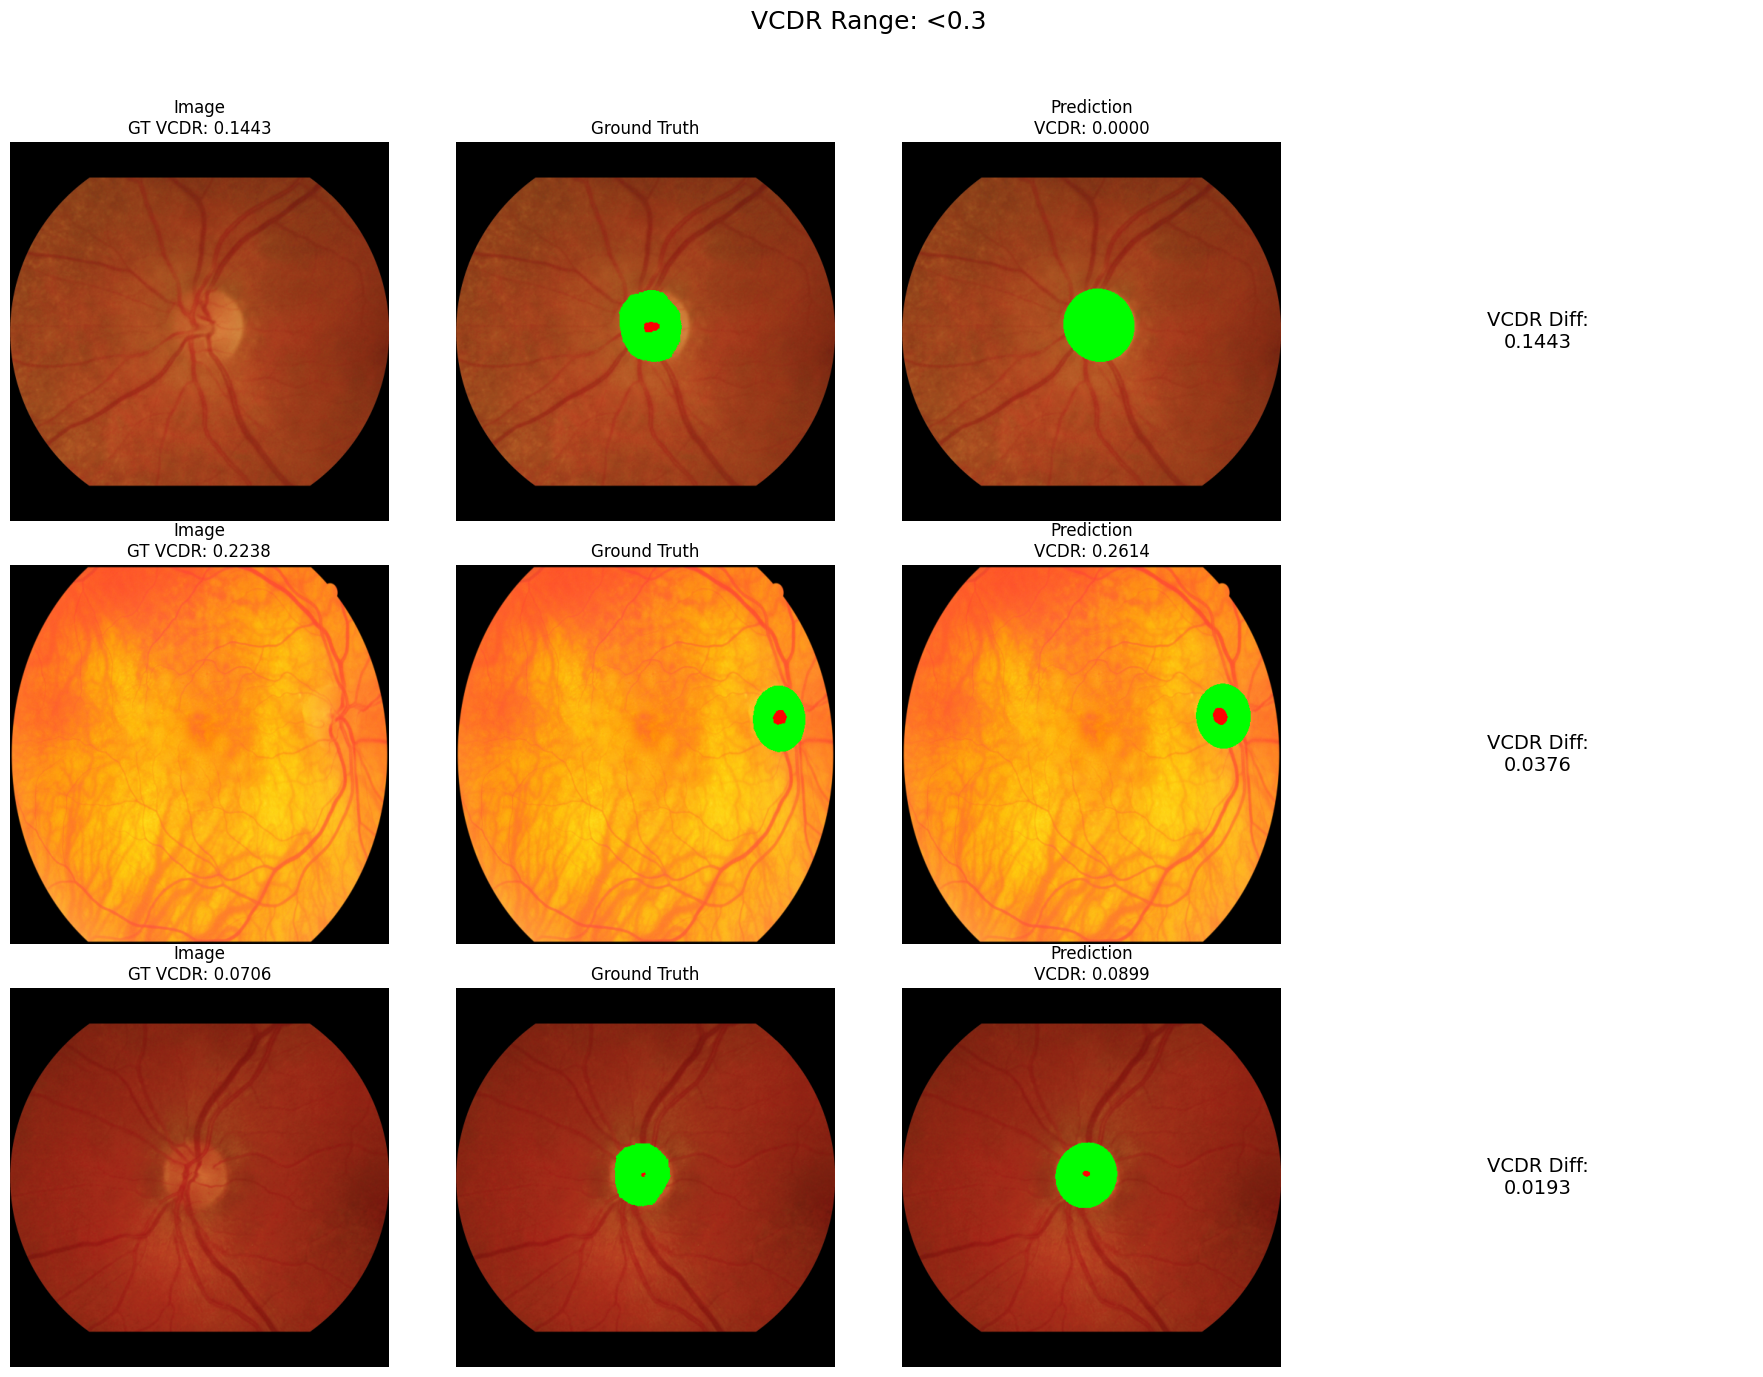

VCDR Range <0.3 - Mean Absolute Difference: 0.0671, Std Dev: 0.0551


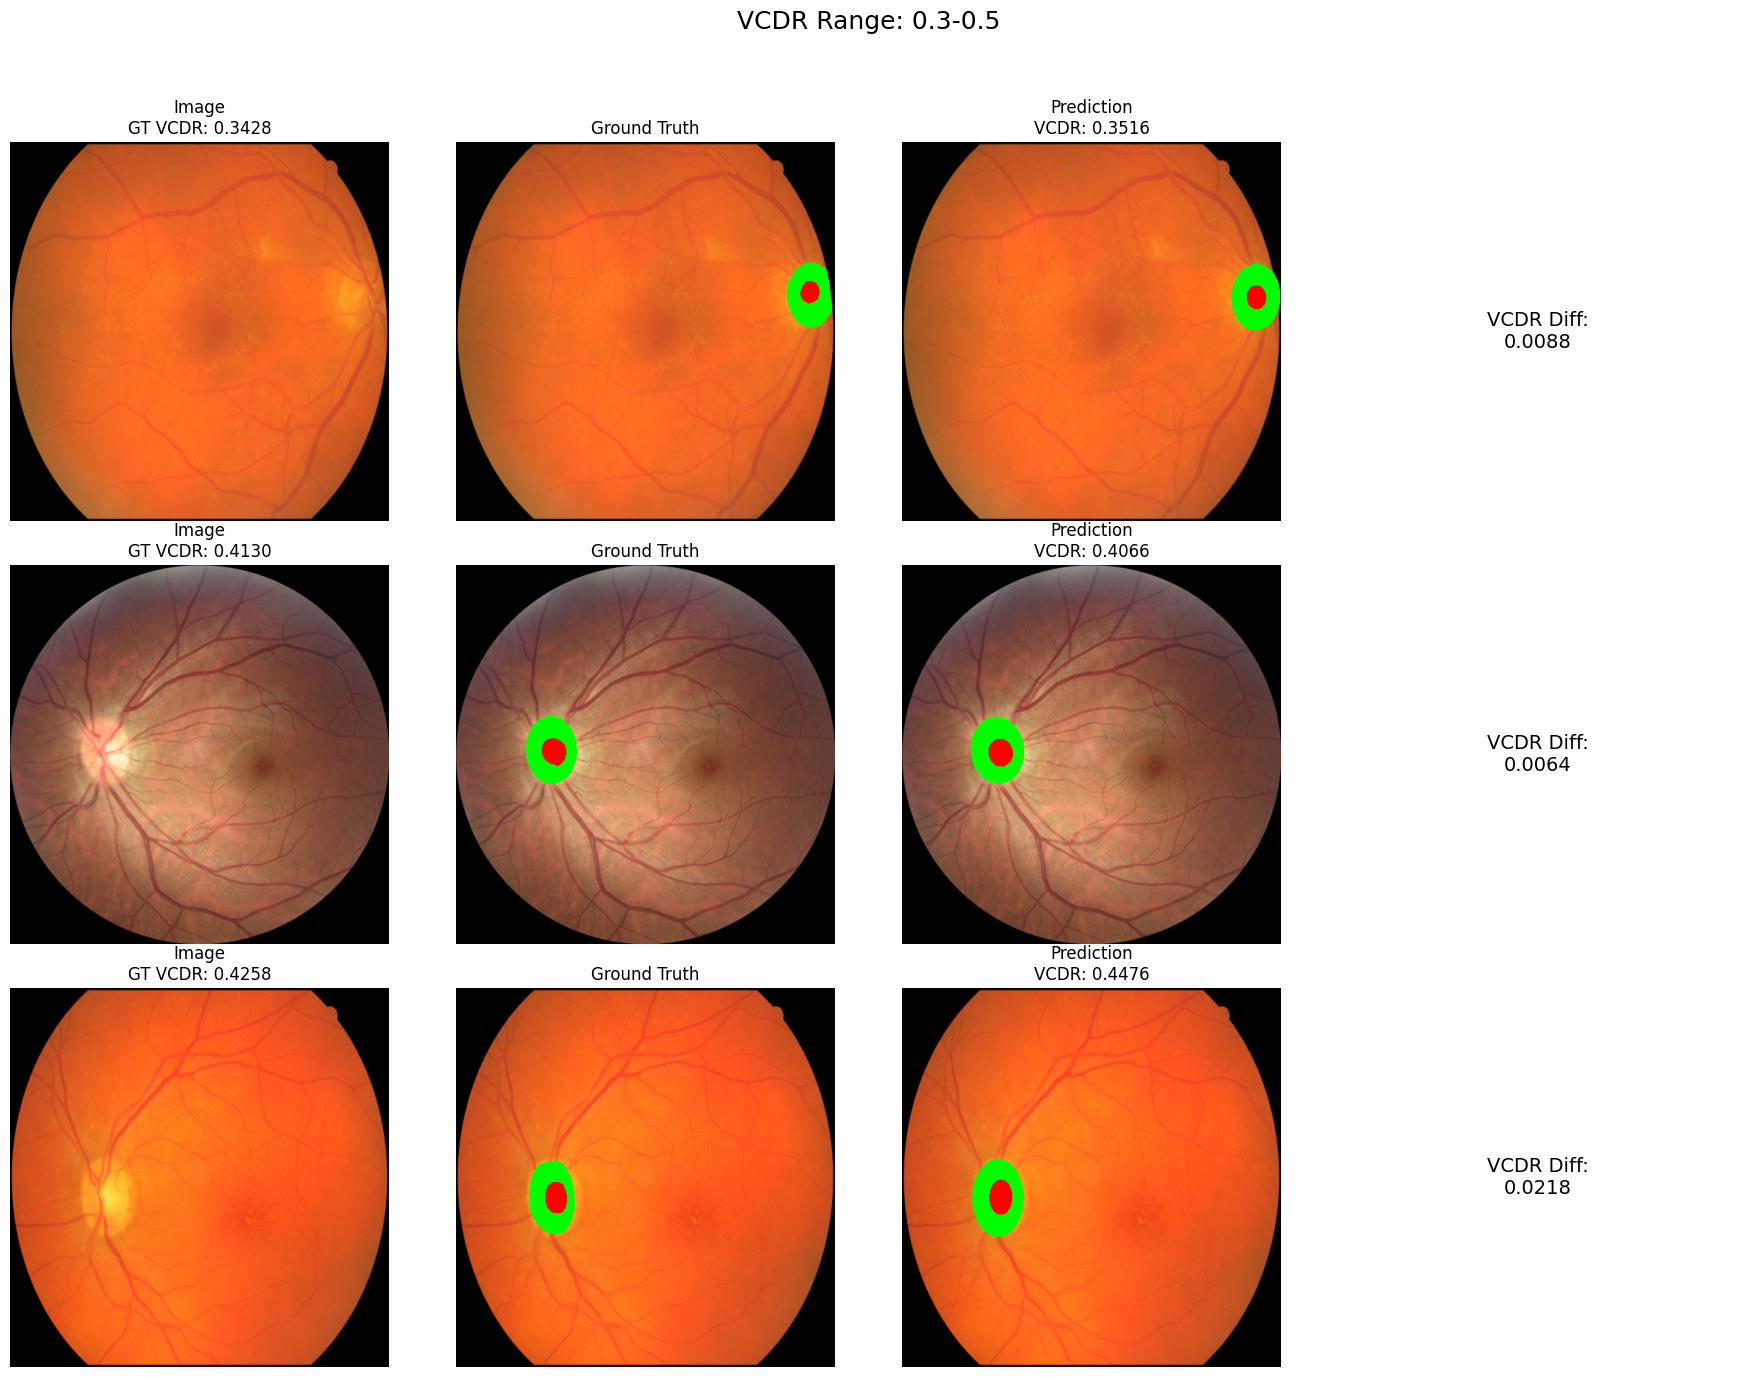

VCDR Range 0.3-0.5 - Mean Absolute Difference: 0.0124, Std Dev: 0.0068


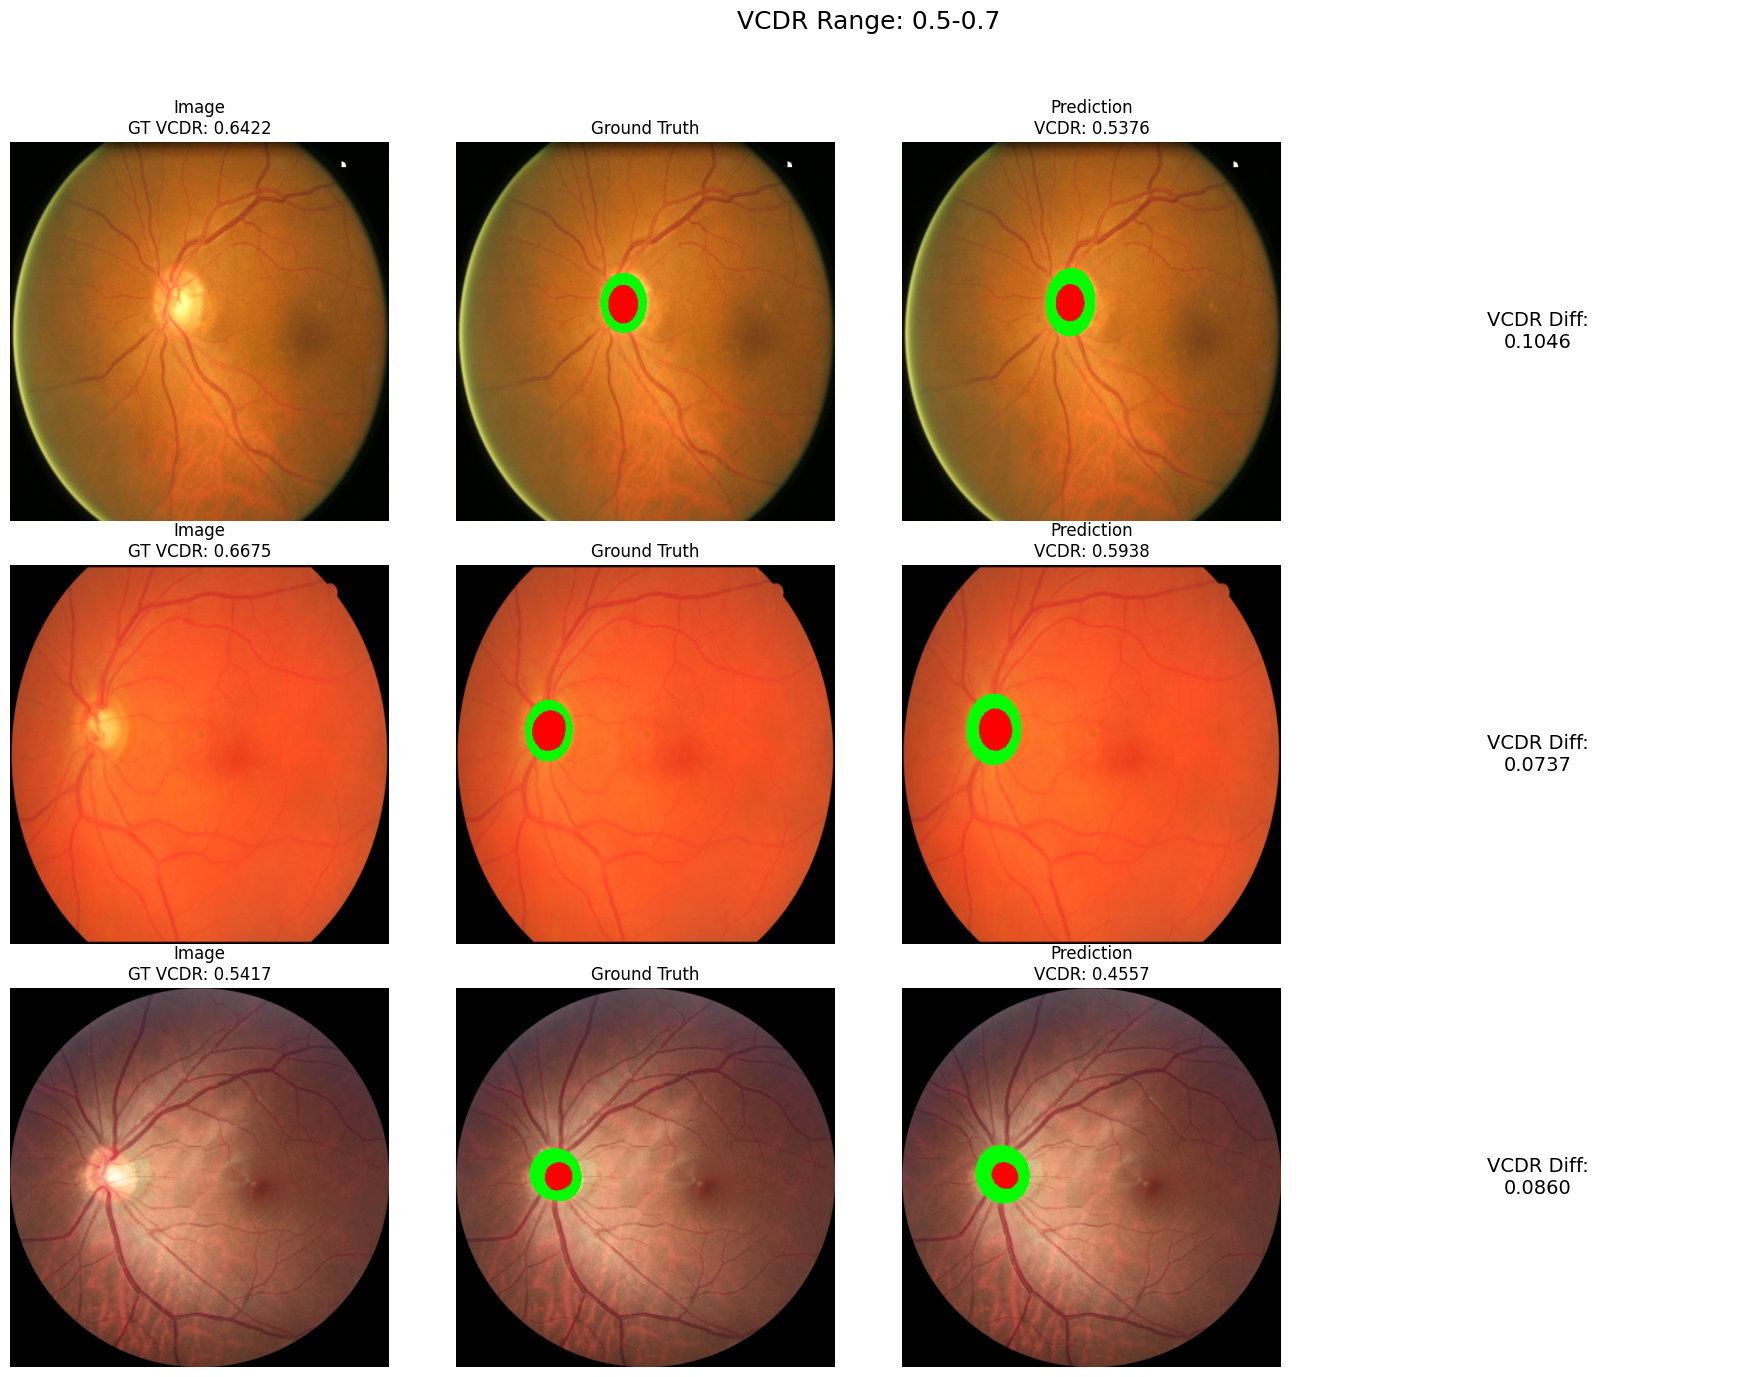

VCDR Range 0.5-0.7 - Mean Absolute Difference: 0.0881, Std Dev: 0.0127


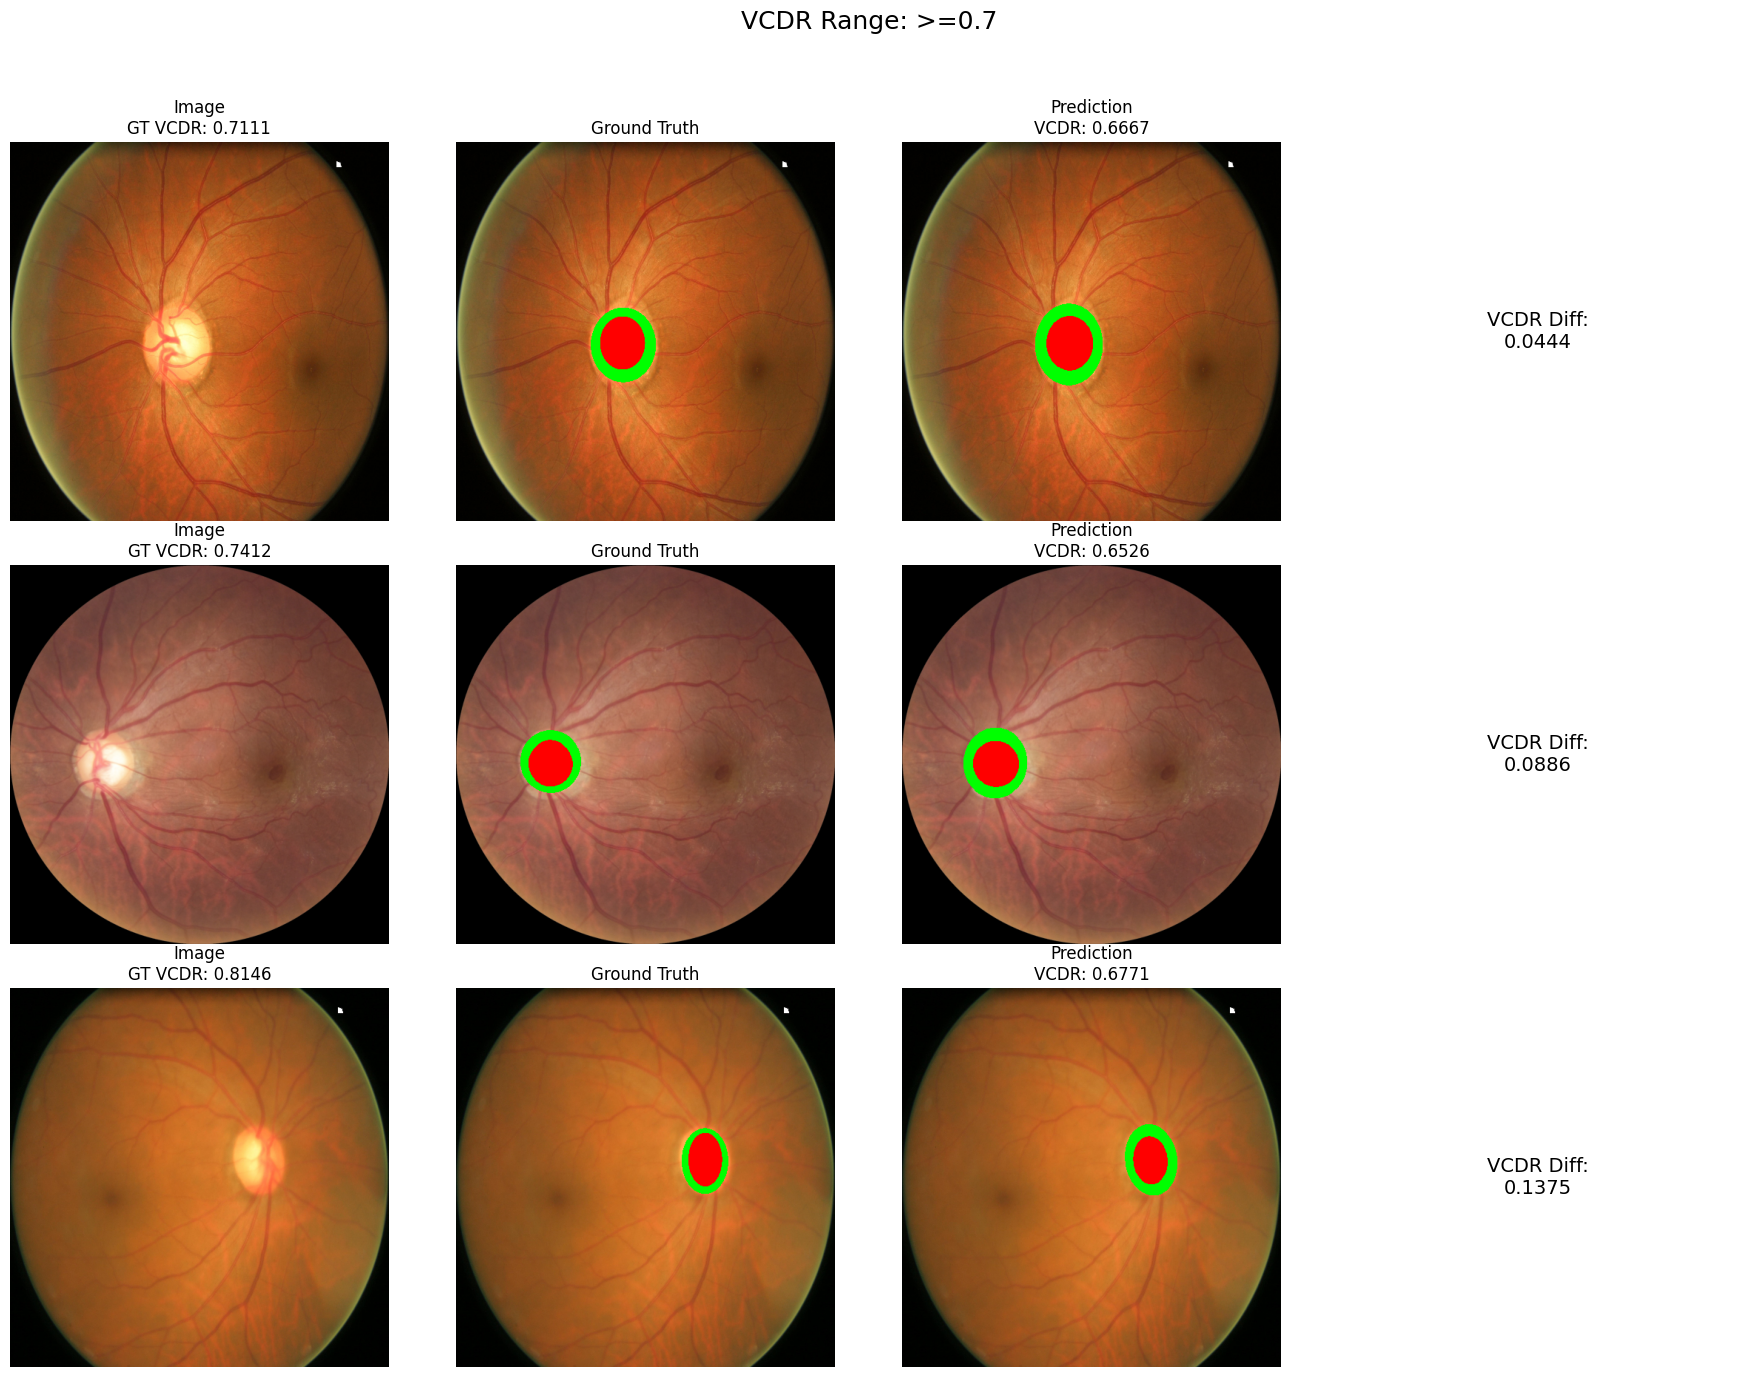

VCDR Range >=0.7 - Mean Absolute Difference: 0.0902, Std Dev: 0.0380


In [17]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ========== SETTINGS ==========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = "deeplabv3+_SMDG+ORIGA+G1020_withweights.pth"

data = {
    "<0.3": [
        ("SMDG+ORIGA+G1020/test/images/PAPILA-409.png", "SMDG+ORIGA+G1020/test/masks/PAPILA-409.png", 0.1443),
        ("SMDG+ORIGA+G1020/test/images/image_1255.png", "SMDG+ORIGA+G1020/test/masks/image_1255.png", 0.2238),
        ("SMDG+ORIGA+G1020/test/images/PAPILA-441.png", "SMDG+ORIGA+G1020/test/masks/PAPILA-441.png", 0.0706),
    ],
    "0.3-0.5": [
        ("SMDG+ORIGA+G1020/test/images/image_1233.png", "SMDG+ORIGA+G1020/test/masks/image_1233.png", 0.3428),
        ("SMDG+ORIGA+G1020/test/images/REFUGE1-val-99.png", "SMDG+ORIGA+G1020/test/masks/REFUGE1-val-99.png", 0.4130),
        ("SMDG+ORIGA+G1020/test/images/image_2375.png", "SMDG+ORIGA+G1020/test/masks/image_2375.png", 0.4258),
    ],
    "0.5-0.7": [
        ("SMDG+ORIGA+G1020/test/images/195.png", "SMDG+ORIGA+G1020/test/masks/195.png", 0.6422),
        ("SMDG+ORIGA+G1020/test/images/image_1702.png", "SMDG+ORIGA+G1020/test/masks/image_1702.png", 0.6675),
        ("SMDG+ORIGA+G1020/test/images/REFUGE1-val-109.png", "SMDG+ORIGA+G1020/test/masks/REFUGE1-val-109.png", 0.5417),
    ],
    ">=0.7": [
        ("SMDG+ORIGA+G1020/test/images/645.png", "SMDG+ORIGA+G1020/test/masks/645.png", 0.7111),
        ("SMDG+ORIGA+G1020/test/images/REFUGE1-val-49.png", "SMDG+ORIGA+G1020/test/masks/REFUGE1-val-49.png", 0.7412),
        ("SMDG+ORIGA+G1020/test/images/507.png", "SMDG+ORIGA+G1020/test/masks/507.png", 0.8146),
    ]
}

# ========== MASK UTILS ==========
def convert_mask(mask):
    mask_class = np.zeros_like(mask, dtype=np.uint8)
    mask_class[mask == 255] = 2  # cup
    mask_class[mask == 128] = 1  # disc
    mask_class[mask == 0] = 0    # background
    return mask_class

def color_overlay(image, mask):
    overlay = image.copy()
    colors = {
        1: [0, 255, 0],    # disc - green
        2: [255, 0, 0]     # cup - red
    }
    for cls, color in colors.items():
        overlay[mask == cls] = color
    return overlay

def calculate_vcdr(mask_pred):
    cup_coords = np.where(mask_pred == 2)
    disc_coords = np.where(mask_pred == 1)

    if len(cup_coords[0]) == 0 or len(disc_coords[0]) == 0:
        return 0.0

    cup_height = cup_coords[0].max() - cup_coords[0].min() + 1
    disc_height = disc_coords[0].max() - disc_coords[0].min() + 1

    if disc_height == 0:
        return 0.0

    return cup_height / disc_height

# ========== ELLIPSE POST-PROCESS ==========
def fit_ellipse_to_mask_class(binary_mask):
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return np.zeros_like(binary_mask)
    
    # Find the largest contour
    contour = max(contours, key=cv2.contourArea)
    if len(contour) < 5:
        return np.zeros_like(binary_mask)

    # Fit ellipse and draw
    ellipse = cv2.fitEllipse(contour)
    ellipse_mask = np.zeros_like(binary_mask)
    cv2.ellipse(ellipse_mask, ellipse, 1, -1)
    return ellipse_mask

def post_process_with_ellipse(mask):
    final_mask = np.zeros_like(mask)
    for class_label in [1, 2]:  # disc and cup
        binary_mask = (mask == class_label).astype(np.uint8)
        ellipse_mask = fit_ellipse_to_mask_class(binary_mask)
        final_mask[ellipse_mask == 1] = class_label
    return final_mask

# ========== TRANSFORM ==========
transform = A.Compose([
    A.Resize(512, 512),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# ========== LOAD MODEL ==========
model = smp.DeepLabV3Plus(
    encoder_name="resnet101",
    encoder_weights=None,
    in_channels=3,
    classes=3
).to(device)

checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# ========== PROCESS AND DISPLAY ==========
for vcdr_range, samples in data.items():
    vcdr_diffs = []
    plt.figure(figsize=(18, 14))
    plt.suptitle(f"VCDR Range: {vcdr_range}", fontsize=18)

    for idx, (img_path, mask_path, gt_vcdr) in enumerate(samples):
        image_orig = cv2.imread(img_path)
        image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
        image_resized = cv2.resize(image_orig, (512, 512))

        mask_raw = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask_resized = cv2.resize(mask_raw, (512, 512), interpolation=cv2.INTER_NEAREST)
        mask_class = convert_mask(mask_resized)

        augmented = transform(image=image_resized, mask=mask_class)
        image_tensor = augmented['image'].unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image_tensor)
            output_mask = torch.argmax(torch.softmax(output, dim=1), dim=1).squeeze(0).cpu().numpy()

        # Apply ellipse fitting
        output_mask = post_process_with_ellipse(output_mask)

        pred_vcdr = calculate_vcdr(output_mask)
        diff = abs(pred_vcdr - gt_vcdr)
        vcdr_diffs.append(diff)

        overlay_gt = color_overlay(image_resized, mask_class)
        overlay_pred = color_overlay(image_resized, output_mask)

        plt.subplot(len(samples), 4, idx * 4 + 1)
        plt.imshow(image_resized)
        plt.title(f"Image\nGT VCDR: {gt_vcdr:.4f}")
        plt.axis('off')

        plt.subplot(len(samples), 4, idx * 4 + 2)
        plt.imshow(overlay_gt)
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(len(samples), 4, idx * 4 + 3)
        plt.imshow(overlay_pred)
        plt.title(f"Prediction\nVCDR: {pred_vcdr:.4f}")
        plt.axis('off')

        plt.subplot(len(samples), 4, idx * 4 + 4)
        plt.text(0.5, 0.5, f"VCDR Diff:\n{diff:.4f}", fontsize=14, ha='center', va='center')
        plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Compute mean and std dev for this range
    mean_diff = np.mean(vcdr_diffs)
    std_diff = np.std(vcdr_diffs)
    print(f"VCDR Range {vcdr_range} - Mean Absolute Difference: {mean_diff:.4f}, Std Dev: {std_diff:.4f}")


/tmp/ipykernel_2348/3204284301.py:110: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


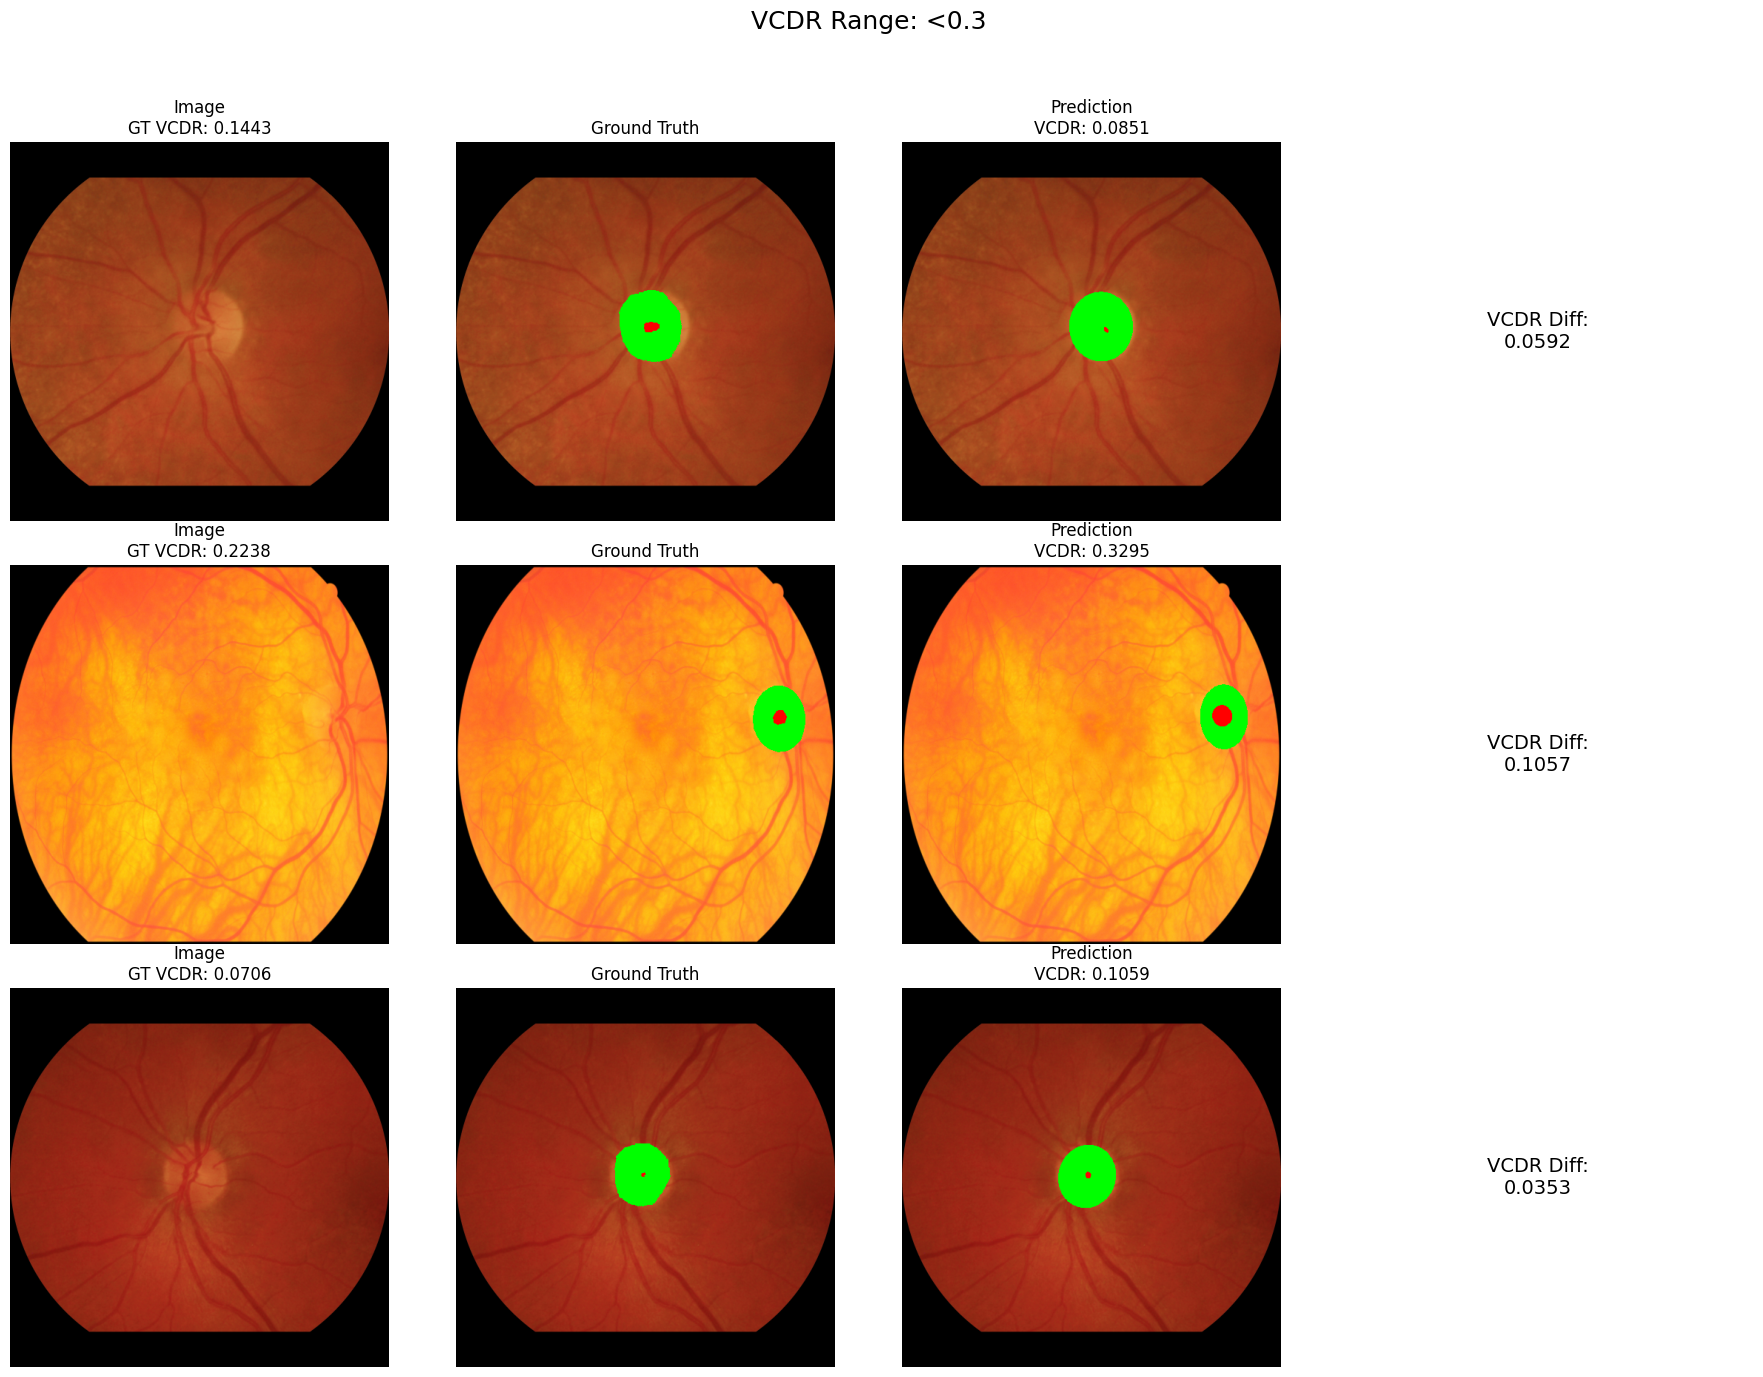

VCDR Range <0.3 - Mean Absolute Difference: 0.0667, Std Dev: 0.0293


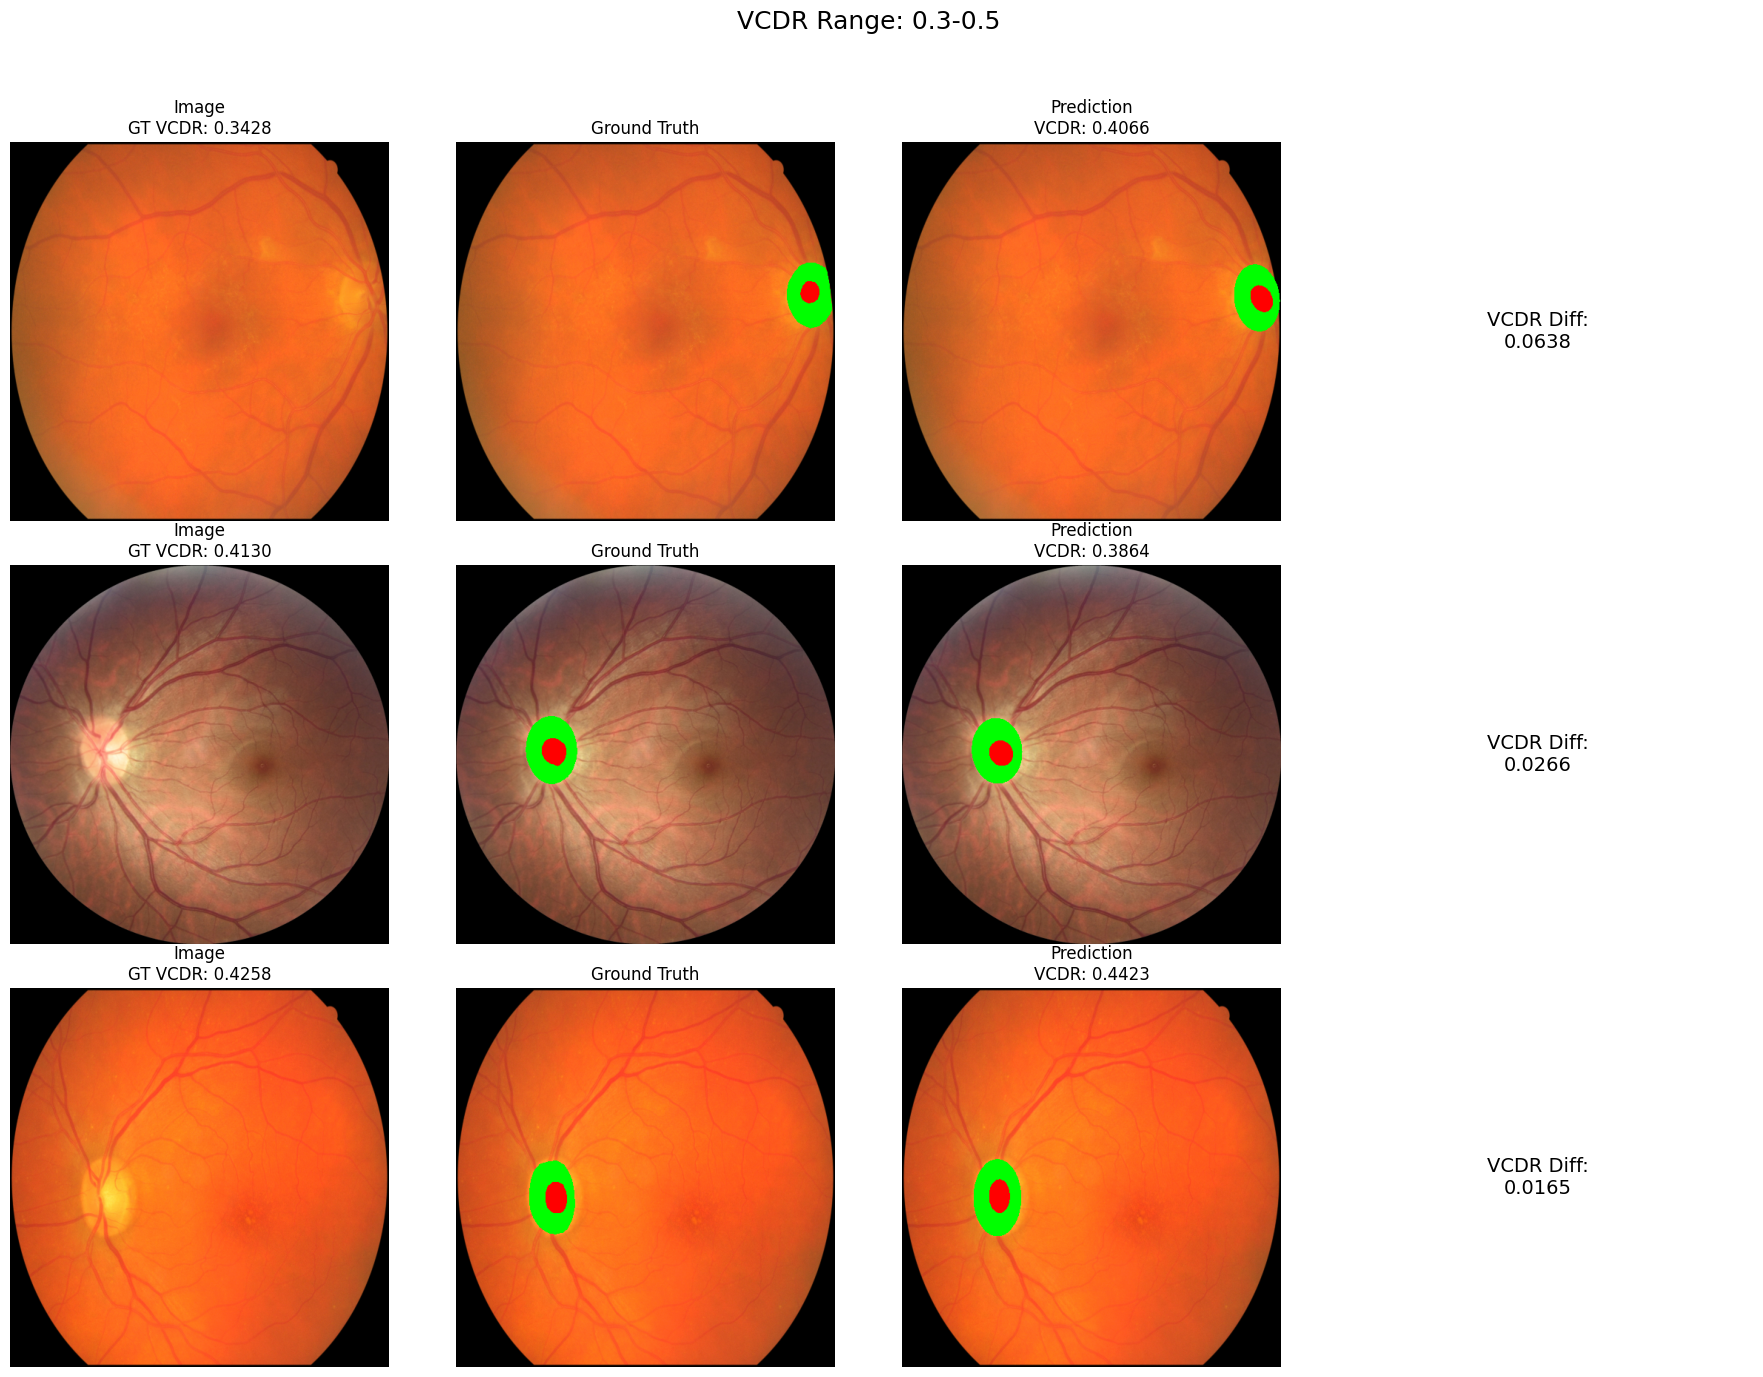

VCDR Range 0.3-0.5 - Mean Absolute Difference: 0.0356, Std Dev: 0.0203


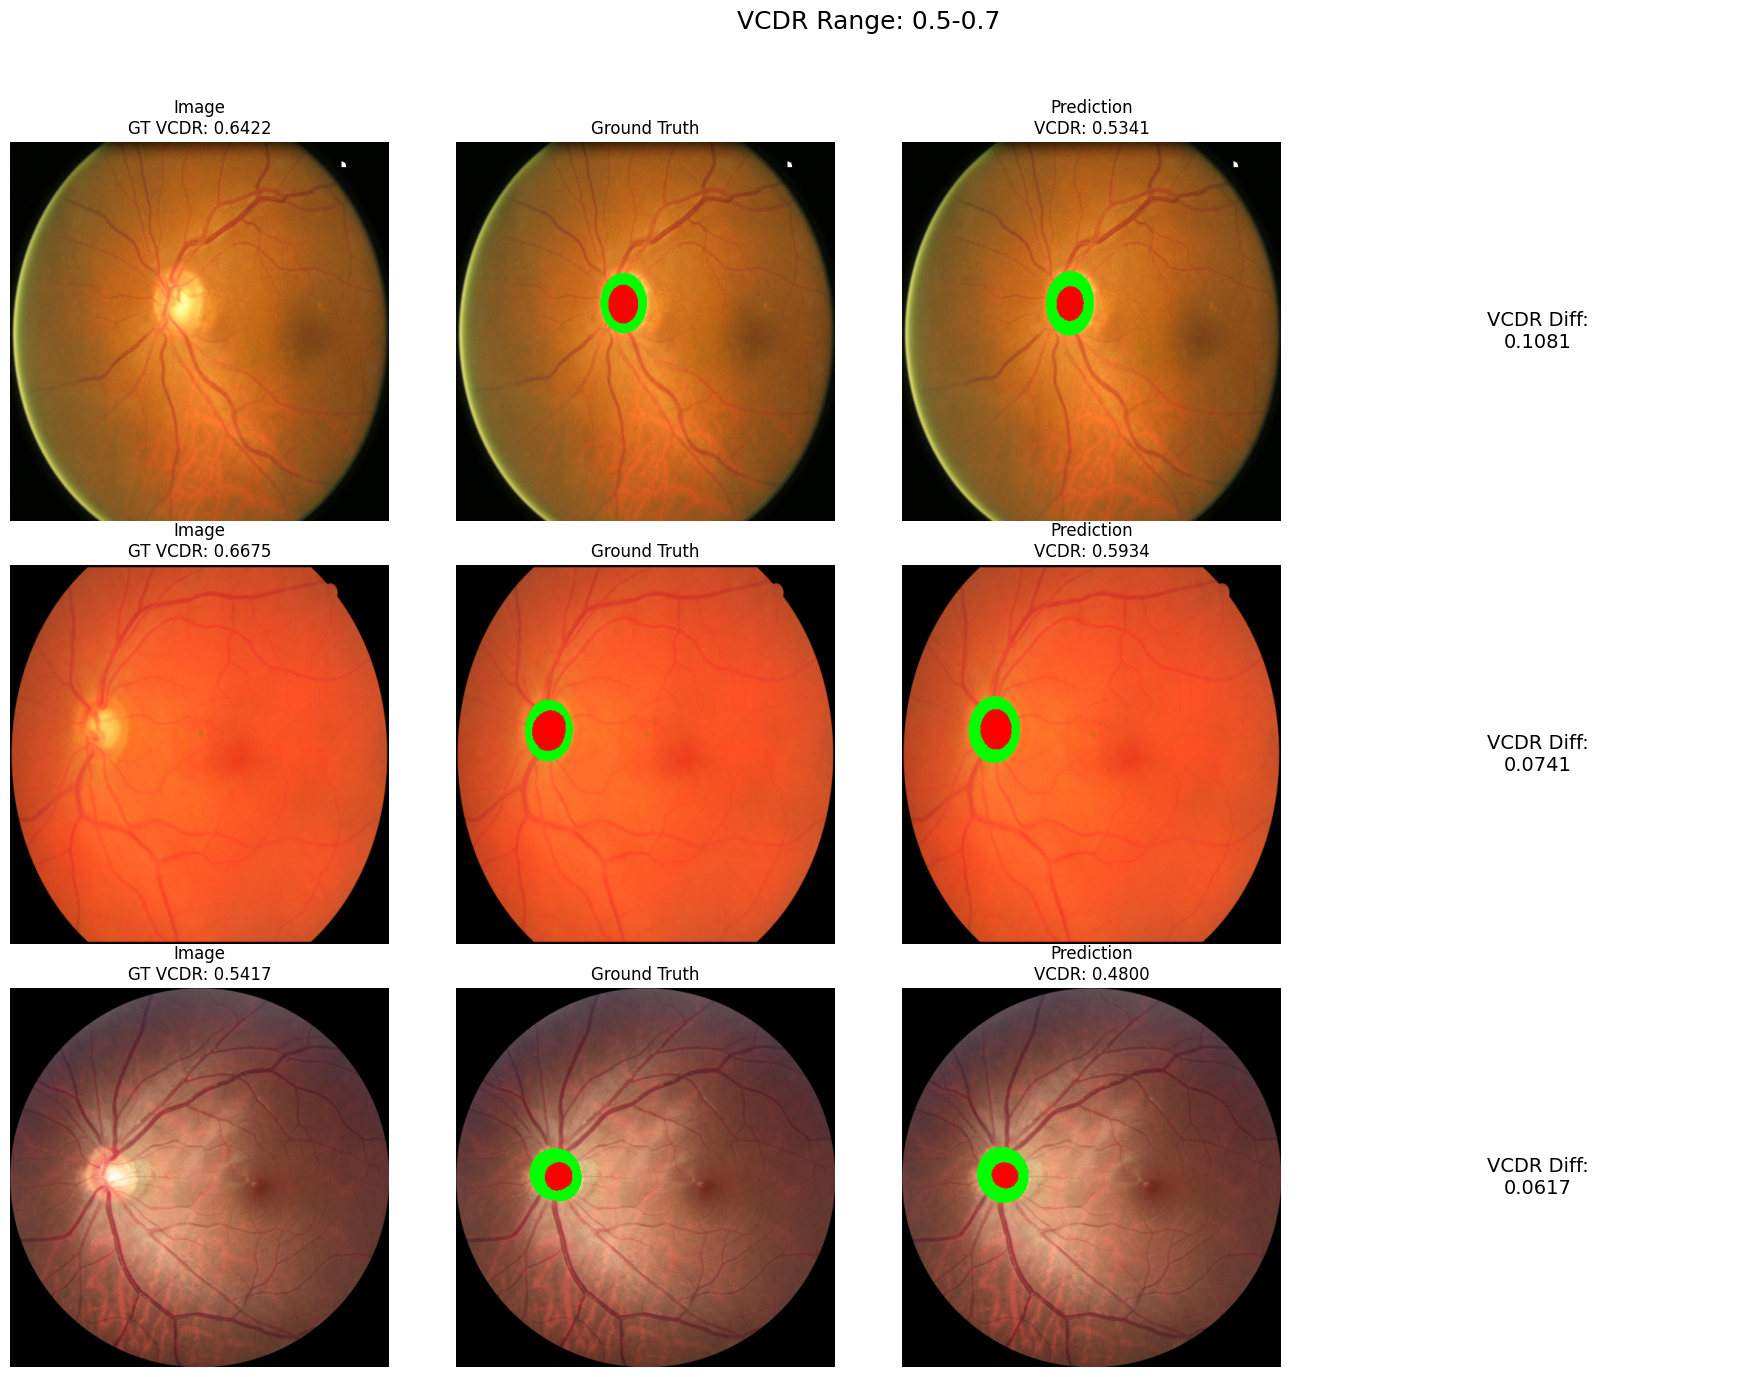

VCDR Range 0.5-0.7 - Mean Absolute Difference: 0.0813, Std Dev: 0.0196


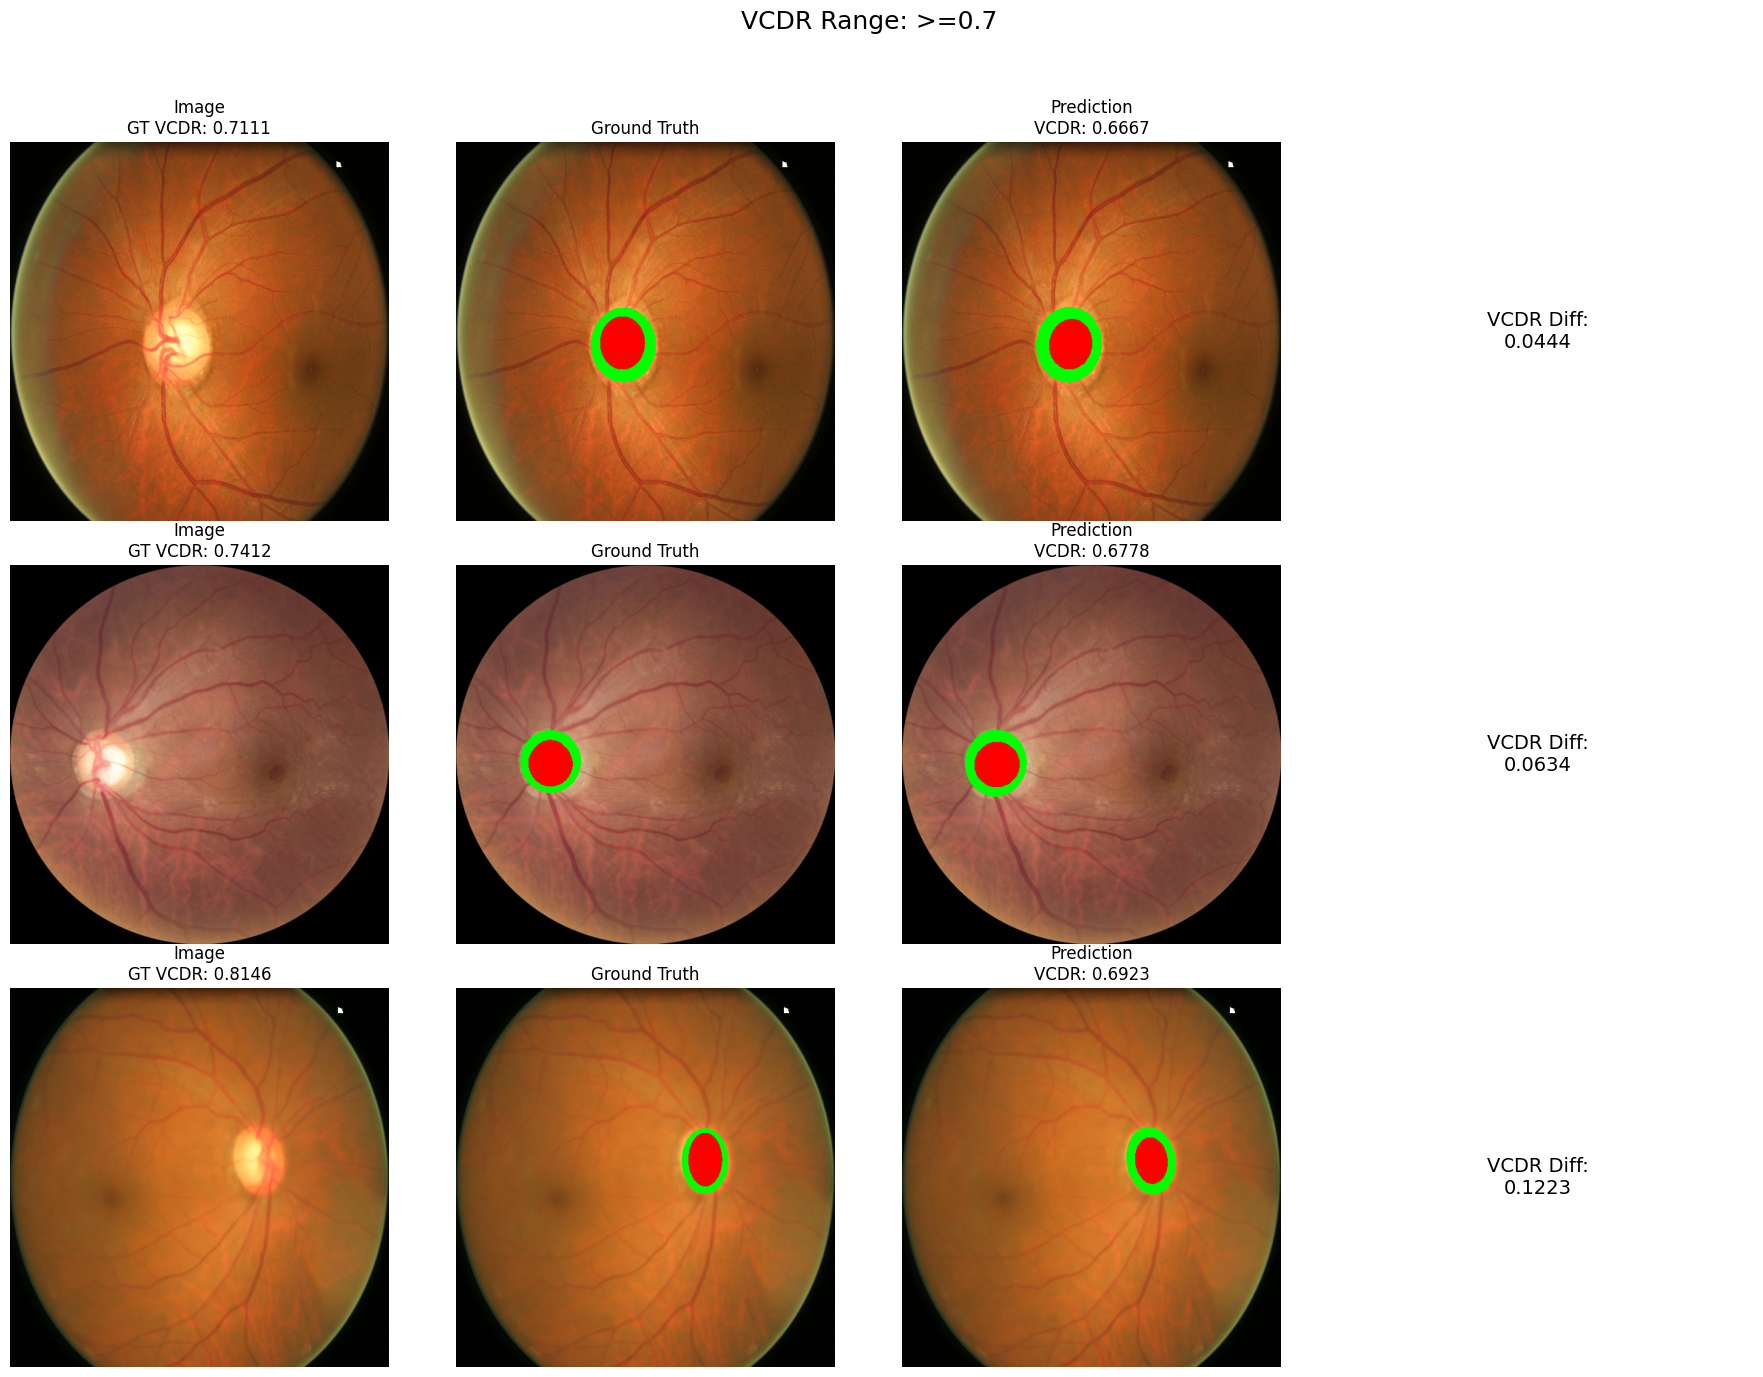

VCDR Range >=0.7 - Mean Absolute Difference: 0.0767, Std Dev: 0.0331


In [18]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ========== SETTINGS ==========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = "deeplabv3+_SMDG+ORIGA+G1020.pth"

data = {
    "<0.3": [
        ("SMDG+ORIGA+G1020/test/images/PAPILA-409.png", "SMDG+ORIGA+G1020/test/masks/PAPILA-409.png", 0.1443),
        ("SMDG+ORIGA+G1020/test/images/image_1255.png", "SMDG+ORIGA+G1020/test/masks/image_1255.png", 0.2238),
        ("SMDG+ORIGA+G1020/test/images/PAPILA-441.png", "SMDG+ORIGA+G1020/test/masks/PAPILA-441.png", 0.0706),
    ],
    "0.3-0.5": [
        ("SMDG+ORIGA+G1020/test/images/image_1233.png", "SMDG+ORIGA+G1020/test/masks/image_1233.png", 0.3428),
        ("SMDG+ORIGA+G1020/test/images/REFUGE1-val-99.png", "SMDG+ORIGA+G1020/test/masks/REFUGE1-val-99.png", 0.4130),
        ("SMDG+ORIGA+G1020/test/images/image_2375.png", "SMDG+ORIGA+G1020/test/masks/image_2375.png", 0.4258),
    ],
    "0.5-0.7": [
        ("SMDG+ORIGA+G1020/test/images/195.png", "SMDG+ORIGA+G1020/test/masks/195.png", 0.6422),
        ("SMDG+ORIGA+G1020/test/images/image_1702.png", "SMDG+ORIGA+G1020/test/masks/image_1702.png", 0.6675),
        ("SMDG+ORIGA+G1020/test/images/REFUGE1-val-109.png", "SMDG+ORIGA+G1020/test/masks/REFUGE1-val-109.png", 0.5417),
    ],
    ">=0.7": [
        ("SMDG+ORIGA+G1020/test/images/645.png", "SMDG+ORIGA+G1020/test/masks/645.png", 0.7111),
        ("SMDG+ORIGA+G1020/test/images/REFUGE1-val-49.png", "SMDG+ORIGA+G1020/test/masks/REFUGE1-val-49.png", 0.7412),
        ("SMDG+ORIGA+G1020/test/images/507.png", "SMDG+ORIGA+G1020/test/masks/507.png", 0.8146),
    ]
}

# ========== MASK UTILS ==========
def convert_mask(mask):
    mask_class = np.zeros_like(mask, dtype=np.uint8)
    mask_class[mask == 255] = 2  # cup
    mask_class[mask == 128] = 1  # disc
    mask_class[mask == 0] = 0    # background
    return mask_class

def color_overlay(image, mask):
    overlay = image.copy()
    colors = {
        1: [0, 255, 0],    # disc - green
        2: [255, 0, 0]     # cup - red
    }
    for cls, color in colors.items():
        overlay[mask == cls] = color
    return overlay

def calculate_vcdr(mask_pred):
    cup_coords = np.where(mask_pred == 2)
    disc_coords = np.where(mask_pred == 1)

    if len(cup_coords[0]) == 0 or len(disc_coords[0]) == 0:
        return 0.0

    cup_height = cup_coords[0].max() - cup_coords[0].min() + 1
    disc_height = disc_coords[0].max() - disc_coords[0].min() + 1

    if disc_height == 0:
        return 0.0

    return cup_height / disc_height

# ========== ELLIPSE POST-PROCESS ==========
def fit_ellipse_to_mask_class(binary_mask):
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return np.zeros_like(binary_mask)
    
    # Find the largest contour
    contour = max(contours, key=cv2.contourArea)
    if len(contour) < 5:
        return np.zeros_like(binary_mask)

    # Fit ellipse and draw
    ellipse = cv2.fitEllipse(contour)
    ellipse_mask = np.zeros_like(binary_mask)
    cv2.ellipse(ellipse_mask, ellipse, 1, -1)
    return ellipse_mask

def post_process_with_ellipse(mask):
    final_mask = np.zeros_like(mask)
    for class_label in [1, 2]:  # disc and cup
        binary_mask = (mask == class_label).astype(np.uint8)
        ellipse_mask = fit_ellipse_to_mask_class(binary_mask)
        final_mask[ellipse_mask == 1] = class_label
    return final_mask

# ========== TRANSFORM ==========
transform = A.Compose([
    A.Resize(512, 512),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# ========== LOAD MODEL ==========
model = smp.DeepLabV3Plus(
    encoder_name="resnet101",
    encoder_weights=None,
    in_channels=3,
    classes=3
).to(device)

checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# ========== PROCESS AND DISPLAY ==========
for vcdr_range, samples in data.items():
    vcdr_diffs = []
    plt.figure(figsize=(18, 14))
    plt.suptitle(f"VCDR Range: {vcdr_range}", fontsize=18)

    for idx, (img_path, mask_path, gt_vcdr) in enumerate(samples):
        image_orig = cv2.imread(img_path)
        image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
        image_resized = cv2.resize(image_orig, (512, 512))

        mask_raw = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask_resized = cv2.resize(mask_raw, (512, 512), interpolation=cv2.INTER_NEAREST)
        mask_class = convert_mask(mask_resized)

        augmented = transform(image=image_resized, mask=mask_class)
        image_tensor = augmented['image'].unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image_tensor)
            output_mask = torch.argmax(torch.softmax(output, dim=1), dim=1).squeeze(0).cpu().numpy()

        # Apply ellipse fitting
        output_mask = post_process_with_ellipse(output_mask)

        pred_vcdr = calculate_vcdr(output_mask)
        diff = abs(pred_vcdr - gt_vcdr)
        vcdr_diffs.append(diff)

        overlay_gt = color_overlay(image_resized, mask_class)
        overlay_pred = color_overlay(image_resized, output_mask)

        plt.subplot(len(samples), 4, idx * 4 + 1)
        plt.imshow(image_resized)
        plt.title(f"Image\nGT VCDR: {gt_vcdr:.4f}")
        plt.axis('off')

        plt.subplot(len(samples), 4, idx * 4 + 2)
        plt.imshow(overlay_gt)
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(len(samples), 4, idx * 4 + 3)
        plt.imshow(overlay_pred)
        plt.title(f"Prediction\nVCDR: {pred_vcdr:.4f}")
        plt.axis('off')

        plt.subplot(len(samples), 4, idx * 4 + 4)
        plt.text(0.5, 0.5, f"VCDR Diff:\n{diff:.4f}", fontsize=14, ha='center', va='center')
        plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Compute mean and std dev for this range
    mean_diff = np.mean(vcdr_diffs)
    std_diff = np.std(vcdr_diffs)
    print(f"VCDR Range {vcdr_range} - Mean Absolute Difference: {mean_diff:.4f}, Std Dev: {std_diff:.4f}")
